# Exploratory Data Analysis Notebook
## Project: Predicting NFL Outcomes Using Machine Learning
## Author: Nick Romano
## DS450-01
## Data Science Senior Capstone
---
---

### Importing Dataset and Libraries

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Importing Dataset**

In [3]:
df = pd.read_csv("nfl_team_stats_2002-2022.csv")
df

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,...,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,...,0-8,0-6,13,15,0,0,27:32,32:28,16,13
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,...,0-9,0-8,17,18,2,0,21:06,39:08,37,31
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,...,0-7,0-6,17,17,0,0,31:31,28:29,23,27
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,...,0-7,0-5,11,15,0,0,37:48,22:12,34,6
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,...,0-10,0-10,20,17,0,0,30:16,29:44,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,2023-01-22,Bengals,Bills,30,19,6-10,5-12,0-0,1-2,240,...,2-4,1-3,9,8,0,0,33:54,26:06,27,10
5637,2023-01-22,Cowboys,49ers,15,21,5-15,7-14,2-2,0-0,206,...,1-3,1-3,10,9,0,0,27:07,32:53,12,19
5638,2023-01-29,49ers,Eagles,11,25,2-8,5-15,0-2,3-3,83,...,0-0,4-6,10,10,0,0,22:34,37:26,7,31
5639,2023-01-29,Bengals,Chiefs,18,23,6-14,7-14,1-1,1-1,238,...,1-3,2-3,11,10,0,0,27:09,32:51,20,23


---
### Dataset Details

**Data Shape and Data Info**

*Shape method returns the number of rows and number of columns for the dataframe. According to the following output, there are 5641 rows and 39 columns. This indicates that there are 5641 games recorded over the span that the dataset covers and that the dataset has 39 statistics for each game.   
The .info method returns a report on each column including the column name, non-null count and datatype. Looking ar the report, it appears that the datset contains the date of the game, the two teams playing, a handful of statistics for both the away and home team, and the score for each game.*

In [4]:
df.shape

(5641, 39)

In [5]:
df.columns

Index(['date', 'away', 'home', 'first_downs_away', 'first_downs_home',
       'third_downs_away', 'third_downs_home', 'fourth_downs_away',
       'fourth_downs_home', 'passing_yards_away', 'passing_yards_home',
       'rushing_yards_away', 'rushing_yards_home', 'total_yards_away',
       'total_yards_home', 'comp_att_away', 'comp_att_home', 'sacks_away',
       'sacks_home', 'rushing_attempts_away', 'rushing_attempts_home',
       'fumbles_away', 'fumbles_home', 'int_away', 'int_home',
       'turnovers_away', 'turnovers_home', 'penalties_away', 'penalties_home',
       'redzone_away', 'redzone_home', 'drives_away', 'drives_home',
       'def_st_td_away', 'def_st_td_home', 'possession_away',
       'possession_home', 'score_away', 'score_home'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5641 entries, 0 to 5640
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   5641 non-null   object
 1   away                   5641 non-null   object
 2   home                   5641 non-null   object
 3   first_downs_away       5641 non-null   int64 
 4   first_downs_home       5641 non-null   int64 
 5   third_downs_away       5641 non-null   object
 6   third_downs_home       5641 non-null   object
 7   fourth_downs_away      5641 non-null   object
 8   fourth_downs_home      5641 non-null   object
 9   passing_yards_away     5641 non-null   int64 
 10  passing_yards_home     5641 non-null   int64 
 11  rushing_yards_away     5641 non-null   int64 
 12  rushing_yards_home     5641 non-null   int64 
 13  total_yards_away       5641 non-null   int64 
 14  total_yards_home       5641 non-null   int64 
 15  comp_att_away        

---
### Minor Data Cleaning

**Explanation**  
One thing that stands out of the output of the `df.info()` code are the handful of object datatype columns that are outside of the `date`, `away team`, `home team`, `possession_away`, and `possession_home` statistics. Looking into these object datatype columns, I noticed that these were stats that are numbers that are sperated by a dash causing them to be stored as strings. For example, the `third_downs_away` and `third_downs_home` columns represent the number of third down conversions and the number of third downs that each team had during the game. So for the handful of object datatype columns that are outside of the `date`, `away team`, `home team`, `possession_away`, and `possession_home` statistics, I decided to seperate and split these columns into different columns and name them appropriately.  
For the `date`, `possession_away`, and `possession_home` columns, I changed the datatypes. For the date, I wanted to make sure that the column was in datetime. For the `possession_away` and `possession_home` columns, I converted these columns to a float datatype where the values represent the time of possesion measured in minutes for which the away and home teams were on offense. The decimal represents the seconds of the time of possesssion if the team didn't have a time of possession that was excatly a time with 0 seconds.

**Object datatype columns that represent a team statistics that really is two statistics in one**

In [7]:
df[['third_downs_away', 'third_downs_home', 
    'fourth_downs_away', 'fourth_downs_home',
    'comp_att_away', 'comp_att_home', 
    'sacks_away', 'sacks_home', 
    'penalties_away', 'penalties_home',
    'redzone_away', 'redzone_home']].head(25)

,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,comp_att_away,comp_att_home,sacks_away,sacks_home,penalties_away,penalties_home,redzone_away,redzone_home
0,4-12,9-16,0-0,0-1,16-26,28-45,0-0,3-24,5-29,10-80,0-8,0-6
1,2-8,7-17,0-0,2-2,24-30,26-39,3-17,4-29,10-90,10-82,0-9,0-8
2,5-13,7-13,0-0,0-0,16-28,20-33,1-6,1-9,8-52,4-33,0-7,0-6
3,6-10,4-11,0-0,0-0,15-19,18-31,1-0,4-31,4-39,9-57,0-7,0-5
4,5-11,4-11,0-0,0-0,20-29,28-40,0-0,1-7,9-87,4-38,0-10,0-10
5,4-8,8-15,0-0,1-1,15-23,25-36,4-15,2-11,4-82,3-15,0-8,0-9
6,7-15,6-10,1-1,0-0,18-36,24-34,6-31,1-2,10-113,6-50,0-3,0-7
7,7-14,6-12,0-1,1-1,17-36,18-27,3-14,0-0,6-68,4-54,0-6,0-8
8,4-13,9-16,0-0,1-2,14-36,28-40,1-0,1-7,1-5,7-56,0-5,0-8
9,5-14,5-14,0-0,0-0,20-34,12-19,2-6,2-16,6-45,6-35,0-3,0-2


**Modifying Columns**  
*Using the `split()` method to split the columns shown above into the two columns each containing one of the numerical values currently being stored as a string. In the process of spliting the current columns, the curent column is being expanded into seperate columns then being stored into the two new columns. Once the new columns have the values, the columns are converted to an integer datatype since the values were still being interpreted as strings. After converting the new columns into the correct datatype the old column containing the combined string value is dropped from the dataset.*  
*Also there are a few lines of code to make sure that the date of the game is in datetime. I also converted the `possession_away` and `possession_home` columns to measured in minutes for offensive possession instead of being read as strings*

In [8]:
#For the string columns that contain numerical data and are seperated by a dash the column is split and expanded then the seperate values are stored into
#two new columns as integer values, then the old column is dropped
df[['third_down_conversions_away','third_down_opportunities_away']] = df['third_downs_away'].str.split(pat="-", expand=True)
df['third_down_conversions_away'] = df['third_down_conversions_away'].astype('int64')
df['third_down_opportunities_away'] = df['third_down_opportunities_away'].astype('int64')
df.drop(columns = ['third_downs_away'], inplace = True)

df[['third_down_conversions_home','third_down_opportunities_home']] = df['third_downs_home'].str.split(pat="-", expand=True)
df['third_down_conversions_home'] = df['third_down_conversions_home'].astype('int64')
df['third_down_opportunities_home'] = df['third_down_opportunities_home'].astype('int64')
df.drop(columns = ['third_downs_home'], inplace = True)

df[['fourth_down_conversions_away','fourth_down_conversion_attempts_away']] = df['fourth_downs_away'].str.split(pat="-", expand=True)
df['fourth_down_conversions_away'] = df['fourth_down_conversions_away'].astype('int64')
df['fourth_down_conversion_attempts_away'] = df['fourth_down_conversion_attempts_away'].astype('int64')
df.drop(columns = ['fourth_downs_away'], inplace = True)

df[['fourth_down_conversions_home','fourth_down_conversion_attempts_home']] = df['fourth_downs_home'].str.split(pat="-", expand=True)
df['fourth_down_conversions_home'] = df['fourth_down_conversions_home'].astype('int64')
df['fourth_down_conversion_attempts_home'] = df['fourth_down_conversion_attempts_home'].astype('int64')
df.drop(columns = ['fourth_downs_home'], inplace = True)

df[['passing_completions_away','passing_attempts_away']] = df['comp_att_away'].str.split(pat="-", expand=True)
df['passing_completions_away'] = df['passing_completions_away'].astype('int64')
df['passing_attempts_away'] = df['passing_attempts_away'].astype('int64')
df.drop(columns = ['comp_att_away'], inplace = True)

df[['passing_completions_home', 'passing_attempts_home']] = df['comp_att_home'].str.split(pat="-", expand=True)
df['passing_completions_home'] = df['passing_completions_home'].astype('int64')
df['passing_attempts_home'] = df['passing_attempts_home'].astype('int64')
df.drop(columns = ['comp_att_home'], inplace = True)

df[['times_sacked_away','sack_yards_lost_away']] = df['sacks_away'].str.split(pat="-", expand=True)
df['times_sacked_away'] = df['times_sacked_away'].astype('int64')
df['sack_yards_lost_away'] = df['sack_yards_lost_away'].astype('int64')
df.drop(columns = ['sacks_away'], inplace = True)

df[['times_sacked_home','sack_yards_lost_home']] = df['sacks_home'].str.split(pat="-", expand=True)
df['times_sacked_home'] = df['times_sacked_home'].astype('int64')
df['sack_yards_lost_home'] = df['sack_yards_lost_home'].astype('int64')
df.drop(columns = ['sacks_home'], inplace = True)

df[['team_penalties_away','penalty_yards_away']] = df['penalties_away'].str.split(pat="-", expand=True)
df['team_penalties_away'] = df['team_penalties_away'].astype('int64')
df['penalty_yards_away'] = df['penalty_yards_away'].astype('int64')
df.drop(columns = ['penalties_away'], inplace = True)

df[['team_penalties_home','penalty_yards_home']] = df['penalties_home'].str.split(pat="-", expand=True)
df['team_penalties_home'] = df['team_penalties_home'].astype('int64')
df['penalty_yards_home'] = df['penalty_yards_home'].astype('int64')
df.drop(columns = ['penalties_home'], inplace = True)

df[['redzone_conversions_away','redzone_opportunities_away']] = df['redzone_away'].str.split(pat="-", expand=True)
df['redzone_conversions_away'] = df['redzone_conversions_away'].astype('int64')
df['redzone_opportunities_away'] = df['redzone_opportunities_away'].astype('int64')
df.drop(columns = ['redzone_away'], inplace = True)

df[['redzone_conversions_home','redzone_opportunities_home']] = df['redzone_home'].str.split(pat="-", expand=True)
df['redzone_conversions_home'] = df['redzone_conversions_home'].astype('int64')
df['redzone_opportunities_home'] = df['redzone_opportunities_home'].astype('int64')
df.drop(columns = ['redzone_home'], inplace = True)


#Modifications to the date and possession_away and possession_home columns
df.date = pd.to_datetime(df.date, format = "%Y-%m-%d")

df.possession_away = pd.to_datetime(df.possession_away, format = "%M:%S")
df.possession_away = df.possession_away.dt.minute + (df.possession_away.dt.second/60)

df.possession_home = pd.to_datetime(df.possession_home, format = "%M:%S")
df.possession_home = df.possession_home.dt.minute + (df.possession_home.dt.second/60)

**Inserting a game_result column [possible target variable for later]**  
Inserting a `game_result` column into the dataframe to store the outcome of each NFL game. The initial value is set to 2, since regular season NFL games can end in ties, so in theory there are three possible outcomes in a football game. Either:
- *The home team wins*
- *The away team wins*
- *or no team wins (tie)*

Using a for loop to iterating through the index values and a nested if-elif-else statement to determine which outcome resulted for each game, the initial game_result value was either updated or left as 2. 
- *If the home team won, the game_result value is 1.*
- *If the away team won, the game_result value is 0.*
- *If result was a tie, the game_result value is 2.*

Interested in checking the value counts of each of the 3 possible outcomes, I created a datafram that merged the value_count and value_frequencoes of the game_result column. In doing so, it appears that the home team won a total of 3180 games (56.3730% of NFL games from 2002-2023), the away team won a total 2447 games (43.3788% of NFL games from 2002-2023), and a game ended in a tie in 14 games (.2482% of of NFL games from 2002-2023).

In [9]:
df.insert(51,"game_result",2)

for indexValue in df.index:
    if (df.score_home.iat[indexValue] > df.score_away.iat[indexValue]):
        df.game_result.iat[indexValue] = 1
    
    elif (df.score_away.iat[indexValue] > df.score_home.iat[indexValue]):
        df.game_result.iat[indexValue] = 0
    
    else:
        df.game_result.iat[indexValue] = 2

In [10]:
countData = df.game_result.value_counts()
FrequencyData = df.game_result.value_counts(normalize = True)
data = pd.concat([countData, FrequencyData], axis = 1)
data

,count,proportion
game_result,,
1,3180,0.563730
0,2447,0.433788
2,14,0.002482


**Updating the position of the columns.**  
*Mainly done for readability of the data. Previously, the data was alternating being away and home team statistics for every statistical category. This rearrangement changes the arrangement of the columns so that the game info (date, away team, home team) come first, away team stats come next, home team stats come next, then game results come last.*

In [11]:
df = df[['date', 'away', 'home', 
         'first_downs_away', 
         'third_down_conversions_away','third_down_opportunities_away', 
         'fourth_down_conversions_away','fourth_down_conversion_attempts_away', 
         'passing_completions_away','passing_attempts_away', 
         'passing_yards_away', 
         'rushing_attempts_away', 
         'rushing_yards_away', 
         'total_yards_away', 
         'times_sacked_away','sack_yards_lost_away', 
         'fumbles_away',
         'int_away', 
         'turnovers_away', 
         'team_penalties_away','penalty_yards_away', 
         'redzone_conversions_away','redzone_opportunities_away', 
         'def_st_td_away', 
         'drives_away', 
         'possession_away',
         'first_downs_home',
         'third_down_conversions_home','third_down_opportunities_home',
         'fourth_down_conversions_home','fourth_down_conversion_attempts_home',
         'passing_completions_home', 'passing_attempts_home',
         'passing_yards_home',
         'rushing_attempts_home',
         'rushing_yards_home', 
         'total_yards_home', 
         'times_sacked_home','sack_yards_lost_home',
         'fumbles_home', 
         'int_home',
         'turnovers_home', 
         'team_penalties_home','penalty_yards_home',
         'redzone_conversions_home','redzone_opportunities_home',
         'def_st_td_home', 
         'drives_home',
         'possession_home', 
         'score_away', 'score_home', 'game_result']]

In [12]:
df

,date,away,home,first_downs_away,third_down_conversions_away,third_down_opportunities_away,fourth_down_conversions_away,fourth_down_conversion_attempts_away,passing_completions_away,passing_attempts_away,...,team_penalties_home,penalty_yards_home,redzone_conversions_home,redzone_opportunities_home,def_st_td_home,drives_home,possession_home,score_away,score_home,game_result
0,2002-09-05,49ers,Giants,13,4,12,0,0,16,26,...,10,80,0,6,0,15,32.466667,16,13,0
1,2002-09-08,Jets,Bills,18,2,8,0,0,24,30,...,10,82,0,8,0,18,39.133333,37,31,0
2,2002-09-08,Vikings,Bears,19,5,13,0,0,16,28,...,4,33,0,6,0,17,28.483333,23,27,1
3,2002-09-08,Chargers,Bengals,27,6,10,0,0,15,19,...,9,57,0,5,0,15,22.200000,34,6,0
4,2002-09-08,Chiefs,Browns,24,5,11,0,0,20,29,...,4,38,0,10,0,17,29.733333,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,2023-01-22,Bengals,Bills,30,6,10,0,0,23,36,...,8,60,1,3,0,8,26.100000,27,10,0
5637,2023-01-22,Cowboys,49ers,15,5,15,2,2,23,37,...,3,30,1,3,0,9,32.883333,12,19,1
5638,2023-01-29,49ers,Eagles,11,2,8,0,2,11,18,...,4,34,4,6,0,10,37.433333,7,31,1
5639,2023-01-29,Bengals,Chiefs,18,6,14,1,1,26,41,...,4,55,2,3,0,10,32.850000,20,23,1


---
### Updated Dataframe Details

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5641 entries, 0 to 5640
Data columns (total 52 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  5641 non-null   datetime64[ns]
 1   away                                  5641 non-null   object        
 2   home                                  5641 non-null   object        
 3   first_downs_away                      5641 non-null   int64         
 4   third_down_conversions_away           5641 non-null   int64         
 5   third_down_opportunities_away         5641 non-null   int64         
 6   fourth_down_conversions_away          5641 non-null   int64         
 7   fourth_down_conversion_attempts_away  5641 non-null   int64         
 8   passing_completions_away              5641 non-null   int64         
 9   passing_attempts_away                 5641 non-null   int64         
 10  

In [14]:
df.shape

(5641, 52)

In [15]:
df.columns

Index(['date', 'away', 'home', 'first_downs_away',
       'third_down_conversions_away', 'third_down_opportunities_away',
       'fourth_down_conversions_away', 'fourth_down_conversion_attempts_away',
       'passing_completions_away', 'passing_attempts_away',
       'passing_yards_away', 'rushing_attempts_away', 'rushing_yards_away',
       'total_yards_away', 'times_sacked_away', 'sack_yards_lost_away',
       'fumbles_away', 'int_away', 'turnovers_away', 'team_penalties_away',
       'penalty_yards_away', 'redzone_conversions_away',
       'redzone_opportunities_away', 'def_st_td_away', 'drives_away',
       'possession_away', 'first_downs_home', 'third_down_conversions_home',
       'third_down_opportunities_home', 'fourth_down_conversions_home',
       'fourth_down_conversion_attempts_home', 'passing_completions_home',
       'passing_attempts_home', 'passing_yards_home', 'rushing_attempts_home',
       'rushing_yards_home', 'total_yards_home', 'times_sacked_home',
       'sack_ya

---
### Checking for Missing Data

#### missingData, nonCategorical_Column_DataReport, and Categorical_Column_DataReport functions

**Creating and Using Functions to Check for Missing Data within the dataset**  
- `missingData()` function takes in a column name within the dataset in the parameter list and returns the number of missing values within the specified column.
- `nonCategorical_Column_DataReport()` function takes in a non-categorical data column within the dataset in the parameter list and returns a string containing the column name, number of missing data entries, total number of entries, the percentage of missing data within the column, and range of the data values. Using the `missingDataReport()` allows for the evalution of the number and percentage of the entries within the column that are missing. In turn it gives insight into which columns have more missing data in relation to the other columns.
- `Cateogical_Column_DataReport()` function takes in a column with categorical data from within the dataset in the parameter list and returns a string containing the column name, number of missing data entries, total number of entries, the percentage of missing data within the column, and a list of unique values within the column.  Using the `missingDataReport()` allows for the evalution of the number and percentage of the entries within the column that are missing. In turn it gives insight into which columns have more missing data in relation to the other columns.

In [16]:
def missingData(colName):
    return df[f"{colName}"].isna().sum()

In [17]:
def nonCategorical_Column_DataReport(colName):
    report = f"Column Name: {colName} \
    \n Number of Missing Data Entries Within Column : {missingData(colName)} \
    \n Total Number of Entries Within Column: {len(df[f'{colName}'])} \
    \n Percentage of Missing Data Within Columne: {(missingData(colName)/len(df[f'{colName}']))*100}% \
    \n Range of Data Values: {min(df[f'{colName}'])} to {max(df[f'{colName}'])} \
    \n Number of Unique Values: {len(df[f'{colName}'].unique())} \n"
    
    return report

In [18]:
def Categorical_Column_DataReport(colName):
    report = f"Column Name: {colName} \
    \n Number of Missing Data Entries Within Column : {missingData(colName)} \
    \n Total Number of Entries Within Column: {len(df[f'{colName}'])} \
    \n Percentage of Missing Data Within Columne: {(missingData(colName)/len(df[f'{colName}']))*100}% \
    \n Number of Unique Values: {len(df[f'{colName}'].unique())} \
    \n Unique_Values: {df[f'{colName}'].unique().tolist()}\n"
    
    return report

#### nonCategorical_Column_DataReport Results

**Going through the non-categorical columns within the dataset and printing out the nonCategorical_Column_DataReport**  
*The only columns that contain categorical data are the away and home team name columns. So the following code iterates through the list of column names without those two columns and passes those within the parameter list in the nonCategorical_Column_DataReport function*

In [19]:
for columnName in ['date', 'first_downs_away', 'third_down_conversions_away', 'third_down_opportunities_away', 'fourth_down_conversions_away', 
                   'fourth_down_conversion_attempts_away', 'passing_completions_away', 'passing_attempts_away', 'passing_yards_away', 
                   'rushing_attempts_away', 'rushing_yards_away', 'total_yards_away', 'times_sacked_away', 'sack_yards_lost_away',
                   'fumbles_away', 'int_away', 'turnovers_away', 'team_penalties_away', 'penalty_yards_away', 'redzone_conversions_away',
                   'redzone_opportunities_away', 'def_st_td_away', 'drives_away', 'possession_away', 'first_downs_home', 'third_down_conversions_home',
                   'third_down_opportunities_home', 'fourth_down_conversions_home', 'fourth_down_conversion_attempts_home', 'passing_completions_home',
                   'passing_attempts_home', 'passing_yards_home', 'rushing_attempts_home', 'rushing_yards_home', 'total_yards_home', 'times_sacked_home',
                   'sack_yards_lost_home', 'fumbles_home', 'int_home', 'turnovers_home', 'team_penalties_home', 'penalty_yards_home', 
                   'redzone_conversions_home', 'redzone_opportunities_home', 'def_st_td_home', 'drives_home', 
                   'possession_home', 'score_away', 'score_home', 'game_result']:
    
    print(nonCategorical_Column_DataReport(columnName))

Column Name: date     
 Number of Missing Data Entries Within Column : 0     
 Total Number of Entries Within Column: 5641     
 Percentage of Missing Data Within Columne: 0.0%     
 Range of Data Values: 2002-09-05 00:00:00 to 2023-02-12 00:00:00     
 Number of Unique Values: 1092 

Column Name: first_downs_away     
 Number of Missing Data Entries Within Column : 0     
 Total Number of Entries Within Column: 5641     
 Percentage of Missing Data Within Columne: 0.0%     
 Range of Data Values: 3 to 37     
 Number of Unique Values: 35 

Column Name: third_down_conversions_away     
 Number of Missing Data Entries Within Column : 0     
 Total Number of Entries Within Column: 5641     
 Percentage of Missing Data Within Columne: 0.0%     
 Range of Data Values: 0 to 15     
 Number of Unique Values: 16 

Column Name: third_down_opportunities_away     
 Number of Missing Data Entries Within Column : 0     
 Total Number of Entries Within Column: 5641     
 Percentage of Missing Data 

#### Categorical_Column_DataReport Results

**Going through the categorical columns within the dataset and printing out the Categorical_Column_DataReport**  
*The only columns that contain categorical data are the away and home team name columns. So the following code iterates through the list of column names with just those two columns and passes them within the parameter list of the Categorical_Column_DataReport function*

In [20]:
for column in ['away', 'home']:
    print(Categorical_Column_DataReport(column))

Column Name: away     
 Number of Missing Data Entries Within Column : 0     
 Total Number of Entries Within Column: 5641     
 Percentage of Missing Data Within Columne: 0.0%     
 Number of Unique Values: 32     
 Unique_Values: ['49ers', 'Jets', 'Vikings', 'Chargers', 'Chiefs', 'Falcons', 'Eagles', 'Lions', 'Cardinals', 'Ravens', 'Colts', 'Rams', 'Seahawks', 'Saints', 'Cowboys', 'Steelers', 'Bears', 'Bengals', 'Titans', 'Dolphins', 'Jaguars', 'Packers', 'Patriots', 'Buccaneers', 'Giants', 'Bills', 'Texans', 'Broncos', 'Raiders', 'Browns', 'Panthers', 'Commanders']

Column Name: home     
 Number of Missing Data Entries Within Column : 0     
 Total Number of Entries Within Column: 5641     
 Percentage of Missing Data Within Columne: 0.0%     
 Number of Unique Values: 32     
 Unique_Values: ['Giants', 'Bills', 'Bears', 'Bengals', 'Browns', 'Packers', 'Titans', 'Dolphins', 'Commanders', 'Panthers', 'Jaguars', 'Broncos', 'Raiders', 'Buccaneers', 'Texans', 'Patriots', 'Falcons', 'Co

---
### Column Statistics

#### Generating a Correlation Matrix Visualized as a Heatmap
A correlation matrix provides information on the correlations of the data within a datset. It returns a numerical value that indicates whether each column is positively correlated, negatively correlated, or not correlated with all the other columns. To better represent this information, I represented the correlation matrix as a heatmap where a darker color indicates that two columns are positively correlated and a lighter shade of a color indicates that two columns are negatively correlated. Since correlations have to be numerical data, I created a list named `numericalColumnData` containing all of the numerical columns and created a correlation matrix contianing only these columns. Then I used the seaborn library to help create a heatmap of the correlation matrix

In [21]:
numericalColumnData = ['first_downs_away',
       'third_down_conversions_away', 'third_down_opportunities_away',
       'fourth_down_conversions_away', 'fourth_down_conversion_attempts_away',
       'passing_completions_away', 'passing_attempts_away',
       'passing_yards_away', 'rushing_attempts_away', 'rushing_yards_away',
       'total_yards_away', 'times_sacked_away', 'sack_yards_lost_away',
       'fumbles_away', 'int_away', 'turnovers_away', 'team_penalties_away',
       'penalty_yards_away', 'redzone_conversions_away',
       'redzone_opportunities_away', 'def_st_td_away', 'drives_away',
       'possession_away', 'first_downs_home', 'third_down_conversions_home',
       'third_down_opportunities_home', 'fourth_down_conversions_home',
       'fourth_down_conversion_attempts_home', 'passing_completions_home',
       'passing_attempts_home', 'passing_yards_home', 'rushing_attempts_home',
       'rushing_yards_home', 'total_yards_home', 'times_sacked_home',
       'sack_yards_lost_home', 'fumbles_home', 'int_home', 'turnovers_home',
       'team_penalties_home', 'penalty_yards_home', 'redzone_conversions_home',
       'redzone_opportunities_home', 'def_st_td_home', 'drives_home',
       'possession_home', 'score_away', 'score_home']

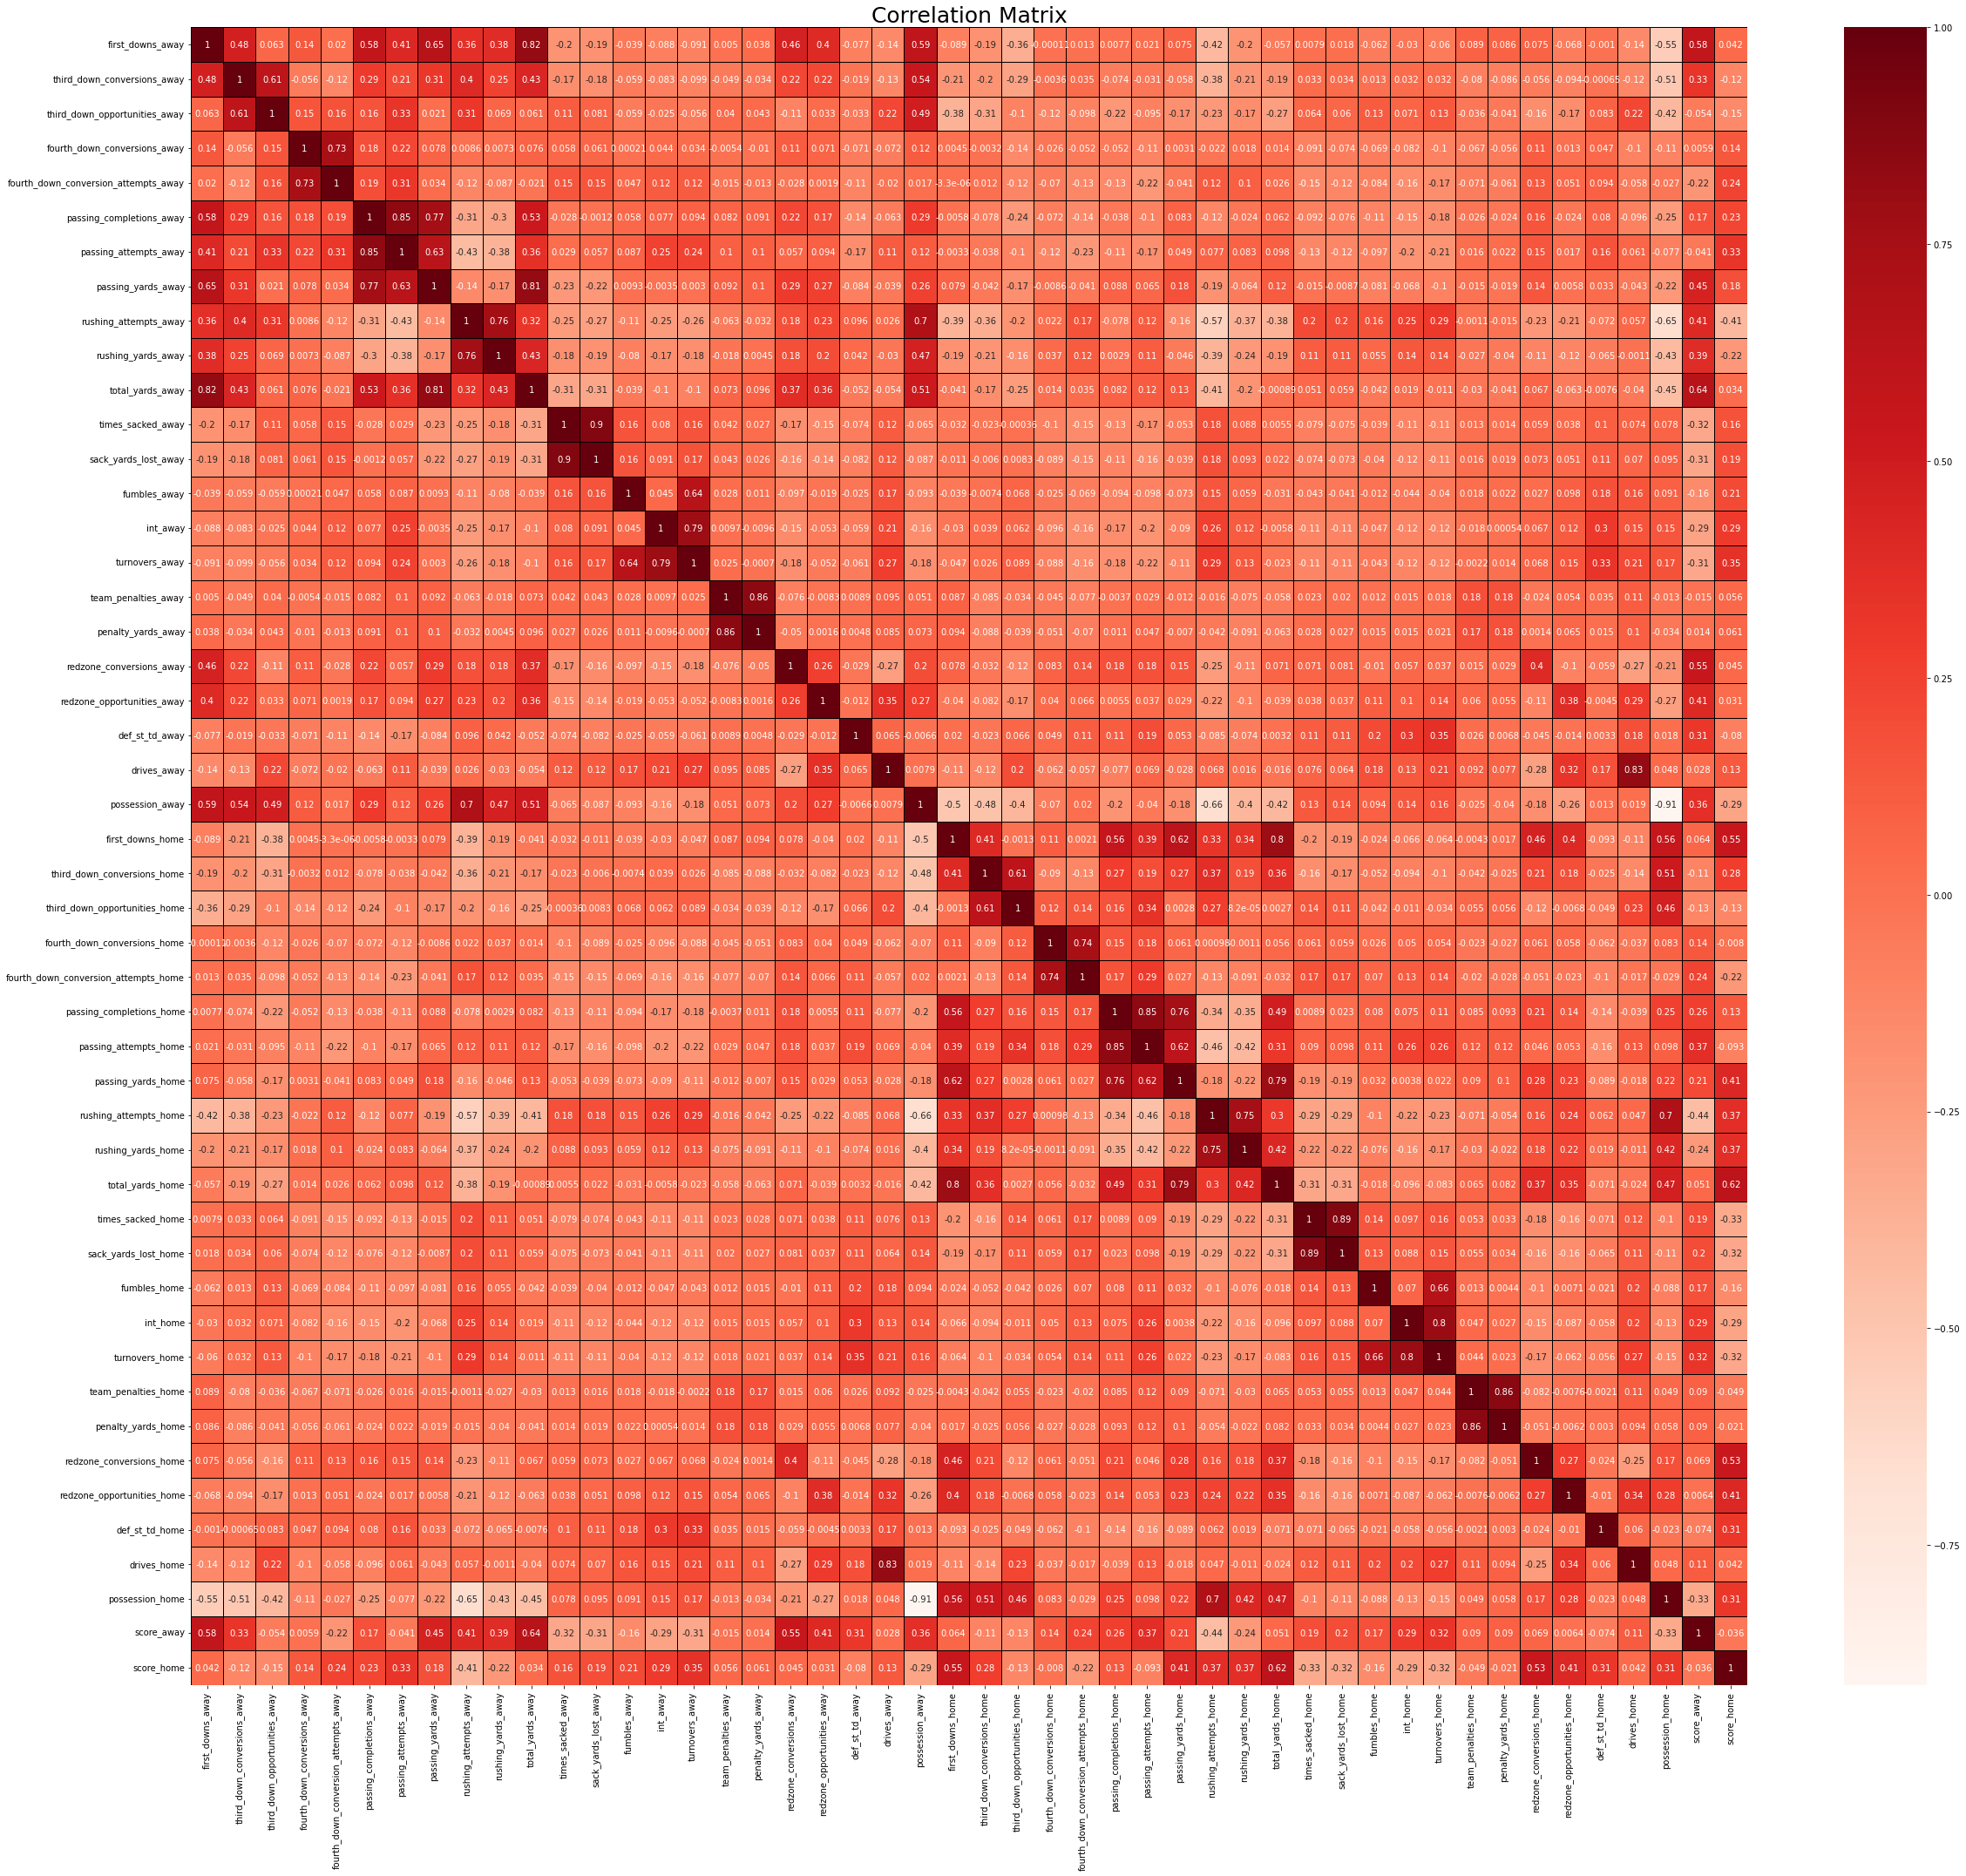

In [22]:
fig = plt.figure(figsize = (40, 35))
sns.heatmap(df[numericalColumnData].corr(), annot = True, cmap = "Reds", linewidth = .5, linecolor = "black")
plt.title("Correlation Matrix", size = 25)
plt.savefig("Correlation_Matrix.jpeg")

#### Numerical Column Statistics
Using the numericalColumnData list that was used in creating the correlation matrix, a table of statistics was created for the numberical columns. This table includes the column name, the number of values, the mean value of the column, the standard deviation of the values within the column, the minimum and maximum values of the column and the 25-50-75 percentile values within the column. This provides a numerical summary for the columns of numerical data.

In [23]:
df[numericalColumnData].describe().T

,count,mean,std,min,25%,50%,75%,max
first_downs_away,5641.0,19.033505,5.072675,3.000000,15.000000,19.000000,22.000000,37.000000
third_down_conversions_away,5641.0,5.067009,2.253157,0.000000,3.000000,5.000000,7.000000,15.000000
third_down_opportunities_away,5641.0,13.262010,2.520580,5.000000,12.000000,13.000000,15.000000,24.000000
fourth_down_conversions_away,5641.0,0.528098,0.770212,0.000000,0.000000,0.000000,1.000000,6.000000
fourth_down_conversion_attempts_away,5641.0,1.066832,1.117067,0.000000,0.000000,1.000000,2.000000,7.000000
passing_completions_away,5641.0,20.905690,6.159261,1.000000,17.000000,21.000000,25.000000,43.000000
passing_attempts_away,5641.0,34.113278,8.523087,3.000000,28.000000,34.000000,40.000000,67.000000
passing_yards_away,5641.0,221.456834,79.092931,-7.000000,165.000000,218.000000,275.000000,516.000000
rushing_attempts_away,5641.0,26.608225,7.858818,6.000000,21.000000,26.000000,32.000000,57.000000
rushing_yards_away,5641.0,110.913313,50.863886,-18.000000,74.000000,104.000000,140.000000,404.000000


#### Column Value Reports
The following two functions `columnValueDataReport` and `columnValueRangeDataReport` are used to help produce summaries of the frequency and proportions of the values in the columns of the entire dataset. The difference between these functions is that the `columnValueDataReport` function just returns the frequency and proportions of the raw data. But `columnValueRangeDataReport` returns the frequency and porportions of the values that are contained within a specified range. This second function was created because of the fact that some columns like `passing_yards_away`, `rushing_yards_away`, `total_yards_away` (just to name a few) have a large number of unique values and large ranges, so it seemed better to report the numner of entries within a specificed groups of values rather than just the raw data.

In [24]:
def columnValueDataReport(columnName):
    countData = df[f"{columnName}"].value_counts()
    FrequencyData = df[f"{columnName}"].value_counts(normalize = True)
    data = pd.concat([countData, FrequencyData], axis = 1)
    return data

def columnValueRangeDataReport(columnName, binNum):
    countData = df[f"{columnName}"].value_counts(bins = binNum)
    FrequencyData = df[f"{columnName}"].value_counts(normalize = True, bins = binNum)
    data = pd.concat([countData, FrequencyData], axis = 1)
    return data

In [25]:
for column in ['away', 'home', 'first_downs_away',
       'third_down_conversions_away', 'third_down_opportunities_away',
       'fourth_down_conversions_away', 'fourth_down_conversion_attempts_away',
       'passing_completions_away', 'passing_attempts_away',
       'passing_yards_away', 'rushing_attempts_away', 'rushing_yards_away',
       'total_yards_away', 'times_sacked_away', 'sack_yards_lost_away',
       'fumbles_away', 'int_away', 'turnovers_away', 'team_penalties_away',
       'penalty_yards_away', 'redzone_conversions_away',
       'redzone_opportunities_away', 'def_st_td_away', 'drives_away',
       'possession_away', 'first_downs_home', 'third_down_conversions_home',
       'third_down_opportunities_home', 'fourth_down_conversions_home',
       'fourth_down_conversion_attempts_home', 'passing_completions_home',
       'passing_attempts_home', 'passing_yards_home', 'rushing_attempts_home',
       'rushing_yards_home', 'total_yards_home', 'times_sacked_home',
       'sack_yards_lost_home', 'fumbles_home', 'int_home', 'turnovers_home',
       'team_penalties_home', 'penalty_yards_home', 'redzone_conversions_home',
       'redzone_opportunities_home', 'def_st_td_home', 'drives_home',
       'possession_home', 'score_away', 'score_home', 'game_result']:
    
    if column == 'first_downs_away' or column == 'first_downs_home':
        print(f"\nColumn Name: {column}")
        print(columnValueRangeDataReport(column, list(range(0, 45, 5))))
        
    elif column == 'passing_completions_away' or column == 'passing_completions_home':
        print(f"\nColumn Name: {column}")
        print(columnValueRangeDataReport(column, list(range(0, 60, 10))))
                                         
    elif column == 'passing_attempts_away' or column == 'passing_attempts_home':
        print(f"\nColumn Name: {column}")
        print(columnValueRangeDataReport(column, list(range(0, 80, 10))))
                                         
    elif column == 'passing_yards_away' or column == 'passing_yards_home':
        print(f"\nColumn Name: {column}")
        print(columnValueRangeDataReport(column, list(range(-25, 625, 50))))
                                         
    elif column == 'rushing_attempts_away' or column == 'rushing_attempts_home':
        print(f"\nColumn Name: {column}")
        print(columnValueRangeDataReport(column, list(range(0, 70, 10))))
                                         
    elif column == 'rushing_yards_away' or column == 'rushing_yards_home':
        print(f"\nColumn Name: {column}")
        print(columnValueRangeDataReport(column, list(range(-25, 475, 50))))
                                         
    elif column == 'total_yards_away' or column == 'total_yards_home':
        print(f"\nColumn Name: {column}")
        print(columnValueRangeDataReport(column, list(range(0, 800, 100))))
                                         
    elif column == 'sack_yards_lost_away' or column == 'sack_yards_lost_home':
        print(f"\nColumn Name: {column}")
        print(columnValueRangeDataReport(column, list(range(0, 110, 10))))
                                         
    elif column == 'penalty_yards_away' or column == 'penalty_yards_home':
        print(f"\nColumn Name: {column}")
        print(columnValueRangeDataReport(column, list(range(0, 220, 20))))
    
    elif column == 'score_away' or column == 'score_home':
        print(f"\nColumn Name: {column}")
        print(columnValueRangeDataReport(column, list(range(0, 70, 7))))
        
    elif column == 'possession_away' or column == 'possession_home':
        print(f"\nColumn Name: {column}")
        print(columnValueRangeDataReport(column, list(range(0, 75, 15))))
    
    else:
        print(f"\nColumn Name: {column}")
        print(columnValueDataReport(column))


Column Name: away
            count  proportion
away                         
Ravens        185    0.032796
Seahawks      184    0.032618
Colts         183    0.032441
Steelers      181    0.032087
Giants        181    0.032087
Patriots      181    0.032087
Packers       181    0.032087
49ers         179    0.031732
Jets          179    0.031732
Eagles        178    0.031555
Titans        178    0.031555
Chargers      177    0.031377
Panthers      177    0.031377
Bengals       176    0.031200
Saints        176    0.031200
Rams          176    0.031200
Falcons       176    0.031200
Vikings       176    0.031200
Cowboys       175    0.031023
Jaguars       175    0.031023
Chiefs        175    0.031023
Cardinals     174    0.030846
Texans        173    0.030668
Browns        172    0.030491
Raiders       172    0.030491
Broncos       172    0.030491
Commanders    172    0.030491
Bills         172    0.030491
Buccaneers    172    0.030491
Lions         172    0.030491
Dolphins      171    

---
### Graphical Exploration of the Data

To help visualize the data that I will be working with, I created some different visualization of the data. The visualizations created include histograms of the data to help depict the distribution of the data, a few year-to-year statistical average line graphs, and bar charts of statistics by game result.

#### Histogram and Boxplot Graphical Exploration

In an effort to save time creating graphs, functions were created to assist in creating the visualizations. In the parameter lists of the functions, all that is passes is a few elemets for the subplots generated. There are three functions in creating boxplots and three functions in creating histograms. There are different functions to create subgraphs of different grid sizes.
- `side_by_side_Boxplot` and `side_by_side_histograms` generates a 2 boxplot and histogram graphs.
- `side_by_side_Boxplot_grid1` and `side_by_side_histogram_grid1` generates a 4 boxplot and histogram graphs (2 by 2).
- `side_by_side_Boxplot_grid2` and `side_by_side_histogram_grid2` generates a 6 boxplot and histogram graphs (3 by 2).

Formatting of the functions for larger grids follows the convention of the `side_by_side_Boxplot` and `side_by_side_histograms` functions in terms of the order of which the elements are added. The same elements are includes for each group of the boxplots and each group of histograms.

##### Side by Side boxplot Functions

In [26]:
def side_by_side_Boxplot(overall_title, column1, lineSpacing1, title1, column2, lineSpacing2, title2, figureSize, x_axis_label):
    figure = plt.figure(figsize=figureSize) #Sets figure size
    plt.suptitle(overall_title, size =15) #Overall Title
    
    subplot1 = figure.add_subplot(121) #Subplot 1
    plt.boxplot(x = df[column1]) #Boxplot created by first column in parameter list
    plt.title(title1) #Individual Boxplot title
    plt.ylabel(x_axis_label) #Label of boxplot y-axis
    plt.yticks(lineSpacing1) #Controls spacing of tick marks on y-axis
    plt.grid(True) #Creates grid of boxplot

    subplot2 = figure.add_subplot(122) #Subplot 2
    plt.boxplot(x = df[column2]) #Boxplot created by second column in parameter list
    plt.title(title2) #Individual Boxplot title
    plt.ylabel(x_axis_label) #Label of boxplot x-axis
    plt.yticks(lineSpacing2) #Controls spacing of tick marks on y-axis
    plt.grid(True) #Creates grid of boxplot
    
    return figure
    
def side_by_side_Boxplot_grid1(overall_title, column1, lineSpacing1, title1, column2, lineSpacing2, title2, 
                               column3, lineSpacing3, title3,  column4, lineSpacing4, title4,  figureSize, x_axis_label):
    figure = plt.figure(figsize = figureSize)
    plt.suptitle(overall_title, size =15)
    
    subplot1 = figure.add_subplot(221)
    plt.boxplot(x = df[column1])
    plt.title(title1)
    plt.ylabel(x_axis_label[0])
    plt.yticks(lineSpacing1)
    plt.grid(True)
    
    subplot2 = figure.add_subplot(222)
    plt.boxplot(x = df[column2])
    plt.title(title2)
    plt.ylabel(x_axis_label[0])
    plt.yticks(lineSpacing2)
    plt.grid(True)
    
    subplot3 = figure.add_subplot(223)
    plt.boxplot(x = df[column3])
    plt.title(title3)
    plt.ylabel(x_axis_label[1])
    plt.yticks(lineSpacing3)
    plt.grid(True)
    
    subplot4 = figure.add_subplot(224)
    plt.boxplot(x = df[column4])
    plt.title(title4)
    plt.ylabel(x_axis_label[1])
    plt.yticks(lineSpacing4)
    plt.grid(True)
    
    return figure
        
def side_by_side_Boxplot_grid2(overall_title, column1, lineSpacing1, title1, column2, lineSpacing2, title2, column3, lineSpacing3, title3, column4, lineSpacing4, title4,
                                 column5, lineSpacing5, title5, column6, lineSpacing6, title6, figureSize,  x_axis_label):
    figure = plt.figure(figsize = figureSize)
    plt.suptitle(overall_title, size =15)
    
    subplot1 = figure.add_subplot(321)
    plt.boxplot(x = df[column1])
    plt.title(title1)
    plt.ylabel(x_axis_label[0])
    plt.yticks(lineSpacing1)
    plt.grid(True)
    
    subplot2 = figure.add_subplot(322)
    plt.boxplot(x = df[column2])
    plt.title(title2)
    plt.ylabel(x_axis_label[0])
    plt.yticks(lineSpacing2)
    plt.grid(True)
    
    subplot3 = figure.add_subplot(323)
    plt.boxplot(x = df[column3])
    plt.title(title3)
    plt.ylabel(x_axis_label[1])
    plt.yticks(lineSpacing3)
    plt.grid(True)
                       
    subplot4 = figure.add_subplot(324)
    plt.boxplot(x = df[column4])
    plt.title(title4)
    plt.ylabel(x_axis_label[1])
    plt.yticks(lineSpacing4)
    plt.grid(True)
    
    subplot5 = figure.add_subplot(325)
    plt.boxplot(x = df[column5])
    plt.title(title5)
    plt.ylabel(x_axis_label[2])
    plt.yticks(lineSpacing5)
    plt.grid(True)
                       
    subplot6 = figure.add_subplot(326)
    plt.boxplot(x = df[column6])
    plt.title(title6)
    plt.xlabel(x_axis_label[2])
    plt.yticks(lineSpacing6)
    plt.grid(True)
                       
    return figure

##### Side by Side Histogram Functions

In [27]:
def side_by_side_histograms(overall_title, column1, binRange1, title1, column2, binRange2, title2, figureSize, x_axis_label, y_axis_label, color1, color2):
    figure = plt.figure(figsize=figureSize) #Sets figure size
    plt.suptitle(overall_title, size =15)  #Overall Title
    
    subplot1 = figure.add_subplot(121) #Subplot 1
    plt.hist(x = df[column1], bins = binRange1, color=color1, edgecolor="black") #Histogram created by first column in parameter list with a specified xtickspacing and coloring.
    plt.title(title1) #Individual Histogram title
    plt.xlabel(x_axis_label) #Specifies x-axis label
    plt.ylabel(y_axis_label) #Specifies y-axis label

    subplot2 = figure.add_subplot(122) #Subplot 2
    plt.hist(x = df[column2], bins = binRange2, color=color2, edgecolor="black")
    plt.title(title2) #Histogram created by first column in parameter list with a specified xtickspacing and coloring.
    plt.xlabel(x_axis_label) #Specifies x-axis label
    plt.ylabel(y_axis_label) #Specifies y-axis label
    
    return figure

def side_by_side_histogram_grid1(overall_title, column1, binRange1, title1, column2, binRange2, title2, column3, binRange3, title3, column4, binRange4, title4, figureSize, 
                                 x_axis_label, y_axis_label, color1, color2):
    
    figure = plt.figure(figsize = figureSize)
    plt.suptitle(overall_title, size =15)
    
    subplot1 = figure.add_subplot(221)
    plt.hist(x = df[column1], bins = binRange1, color = color1, edgecolor="black")
    plt.title(title1)
    plt.xlabel(x_axis_label[0])
    plt.ylabel(y_axis_label)
    
    subplot2 = figure.add_subplot(222)
    plt.hist(x = df[column2], bins = binRange2, color = color2, edgecolor="black")
    plt.title(title2)
    plt.xlabel(x_axis_label[0])
    plt.ylabel(y_axis_label)
    
    subplot3 = figure.add_subplot(223)
    plt.hist(x = df[column3], bins = binRange3, color = color1, edgecolor="black")
    plt.title(title3)
    plt.xlabel(x_axis_label[1])
    plt.ylabel(y_axis_label)
    
    subplot4 = figure.add_subplot(224)
    plt.hist(x = df[column4], bins = binRange4, color = color2, edgecolor="black")
    plt.title(title4)
    plt.xlabel(x_axis_label[1])
    plt.ylabel(y_axis_label)
    
    return figure

def side_by_side_histogram_grid2(overall_title, column1, binRange1, title1, column2, binRange2, title2, column3, binRange3, title3, column4, binRange4, title4, 
                                 column5, binRange5, title5, column6, binRange6, title6, figureSize,  x_axis_label, y_axis_label, color1, color2):
    
    figure = plt.figure(figsize = figureSize)
    plt.suptitle(overall_title, size =15)
    
    subplot1 = figure.add_subplot(321)
    plt.hist(x = df[column1], bins = binRange1, color = color1, edgecolor="black")
    plt.title(title1)
    plt.xlabel(x_axis_label[0])
    plt.ylabel(y_axis_label)
    
    subplot2 = figure.add_subplot(322)
    plt.hist(x = df[column2], bins = binRange2, color = color2, edgecolor="black")
    plt.title(title2)
    plt.xlabel(x_axis_label[0])
    plt.ylabel(y_axis_label)
    
    subplot3 = figure.add_subplot(323)
    plt.hist(x = df[column3], bins = binRange3, color = color1, edgecolor="black")
    plt.title(title3)
    plt.xlabel(x_axis_label[1])
    plt.ylabel(y_axis_label)
    
    subplot4 = figure.add_subplot(324)
    plt.hist(x = df[column4], bins = binRange4, color = color2, edgecolor="black")
    plt.title(title4)
    plt.xlabel(x_axis_label[1])
    plt.ylabel(y_axis_label)
    
    subplot5 = figure.add_subplot(325)
    plt.hist(x = df[column5], bins = binRange5, color = color1, edgecolor="black")
    plt.title(title5)
    plt.xlabel(x_axis_label[2])
    plt.ylabel(y_axis_label)
    
    subplot6 = figure.add_subplot(326)
    plt.hist(x = df[column6], bins = binRange6, color = color2, edgecolor="black")
    plt.title(title6)
    plt.xlabel(x_axis_label[2])
    plt.ylabel(y_axis_label)
    
    return figure

##### Visualizations

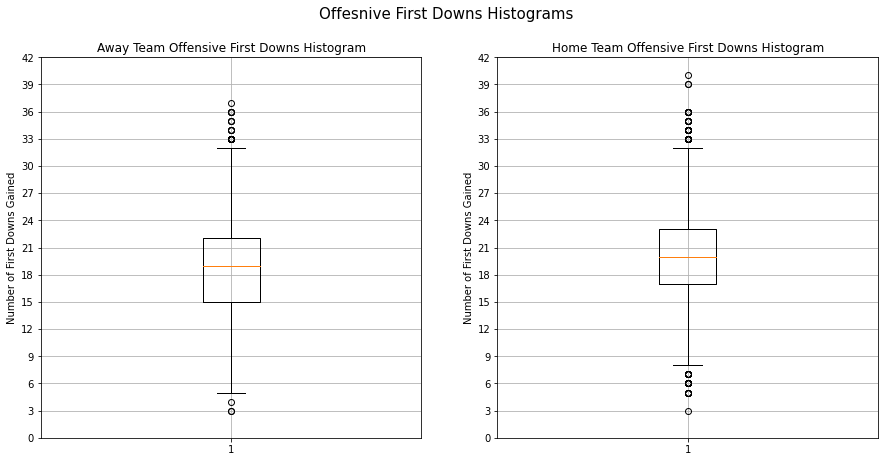

In [28]:
First_Down_Boxplot = side_by_side_Boxplot("Offesnive First Downs Histograms", 
                                          "first_downs_away", list(range(0,45,3)), "Away Team Offensive First Downs Histogram",
                                          "first_downs_home", list(range(0,45,3)), "Home Team Offensive First Downs Histogram",
                                          (15,7), "Number of First Downs Gained")
plt.savefig("First_Down_Boxplots.jpeg")

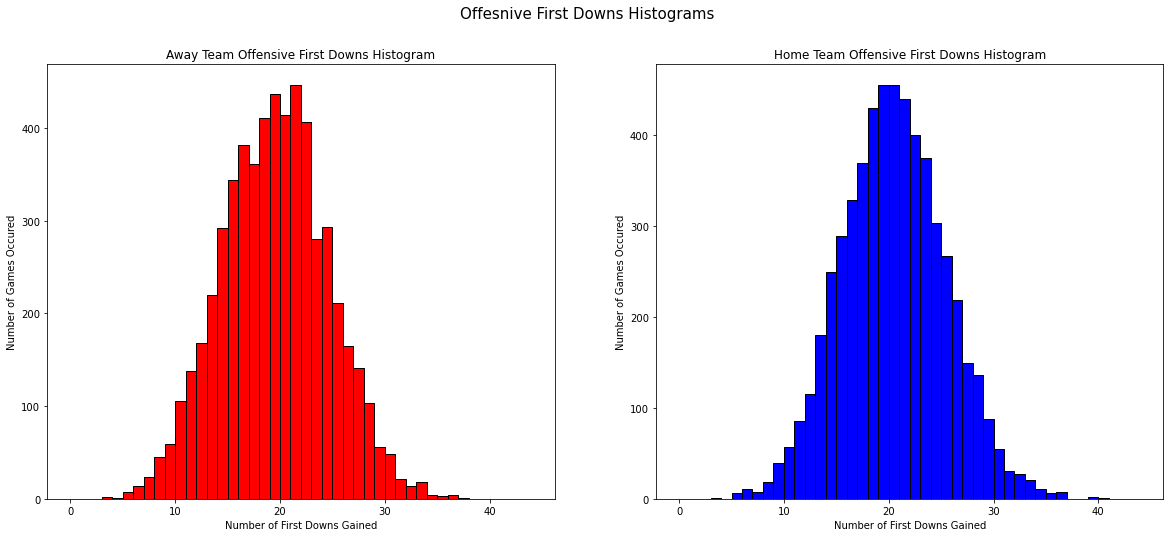

In [29]:
firstDownHistogram = side_by_side_histograms("Offesnive First Downs Histograms", 
                                             "first_downs_away", list(range(0,45,1)), "Away Team Offensive First Downs Histogram", 
                                             "first_downs_home", list(range(0,45,1)), "Home Team Offensive First Downs Histogram", 
                                             (20,8),
                                             "Number of First Downs Gained", "Number of Games Occured", 'red', 'blue')
plt.savefig("First_Downs_Histograms.jpeg")

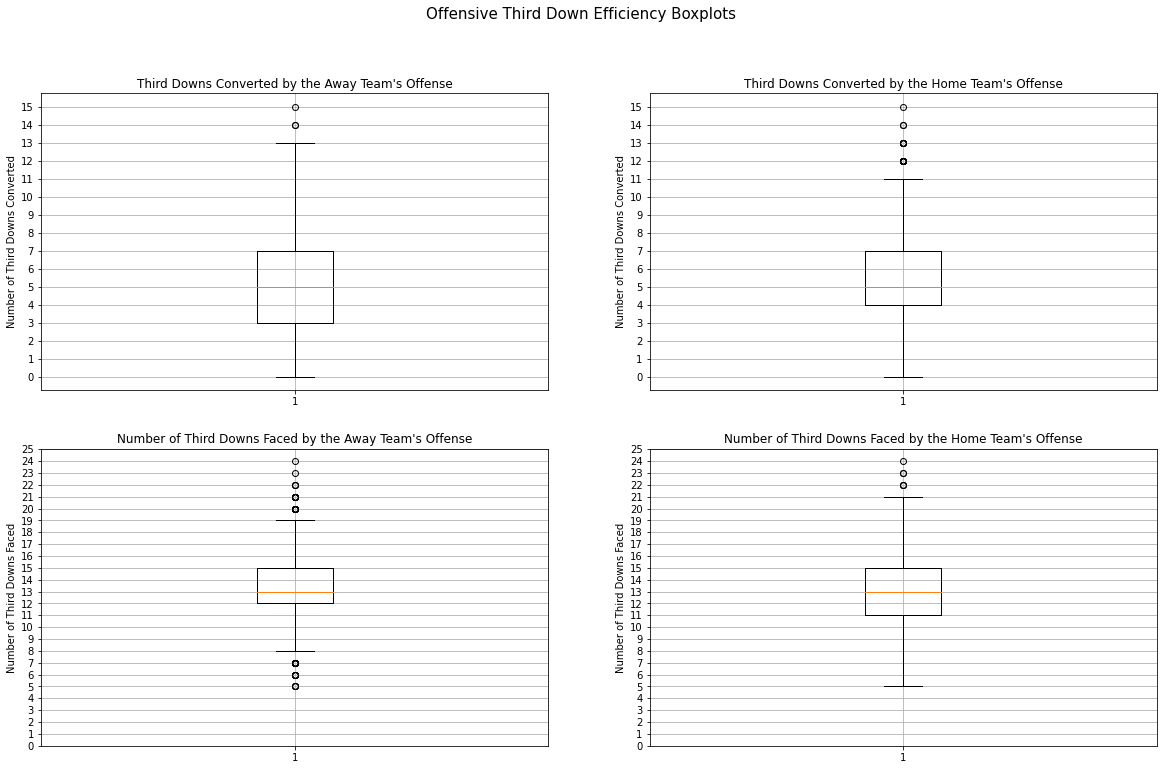

In [30]:
third_down_boxplots = side_by_side_Boxplot_grid1('Offensive Third Down Efficiency Boxplots',
                           'third_down_conversions_away', list(range(0,16,1)), "Third Downs Converted by the Away Team's Offense",
                           'third_down_conversions_home', list(range(0,16,1)), "Third Downs Converted by the Home Team's Offense",
                           'third_down_opportunities_away', list(range(0,26,1)), "Number of Third Downs Faced by the Away Team's Offense",
                           'third_down_opportunities_home', list(range(0,26,1)),"Number of Third Downs Faced by the Home Team's Offense",
                           (20,12), ["Number of Third Downs Converted", "Number of Third Downs Faced"])
plt.savefig("Third_Down_Boxplots.jpeg")

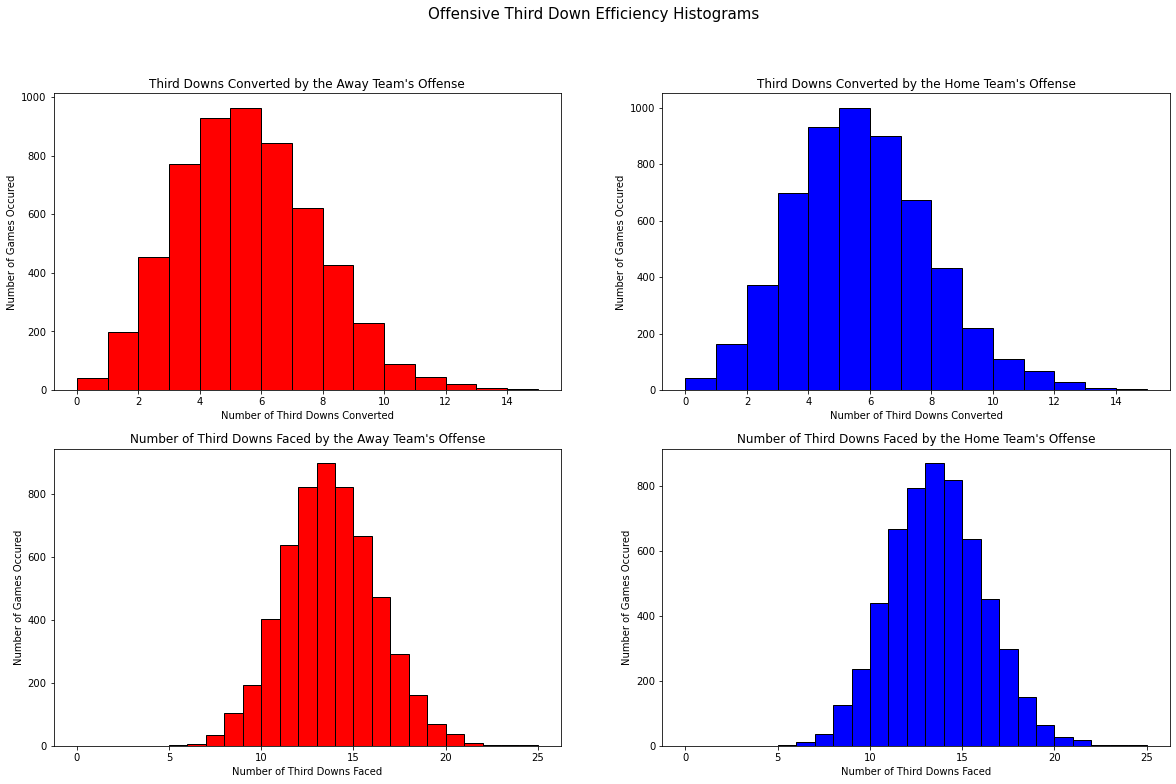

In [31]:
third_down_histogram = side_by_side_histogram_grid1('Offensive Third Down Efficiency Histograms', 
                                                    'third_down_conversions_away', list(range(0,16,1)), "Third Downs Converted by the Away Team's Offense",
                                                    'third_down_conversions_home', list(range(0,16,1)), "Third Downs Converted by the Home Team's Offense",
                                                    'third_down_opportunities_away', list(range(0,26,1)) , "Number of Third Downs Faced by the Away Team's Offense",
                                                    'third_down_opportunities_home', list(range(0,26,1)), "Number of Third Downs Faced by the Home Team's Offense",
                                                    (20,12), ["Number of Third Downs Converted", "Number of Third Downs Faced"], "Number of Games Occured",
                                                    'red', 'blue')

plt.savefig("OffensiveThirdDownEfficiencyHistograms.jpeg")

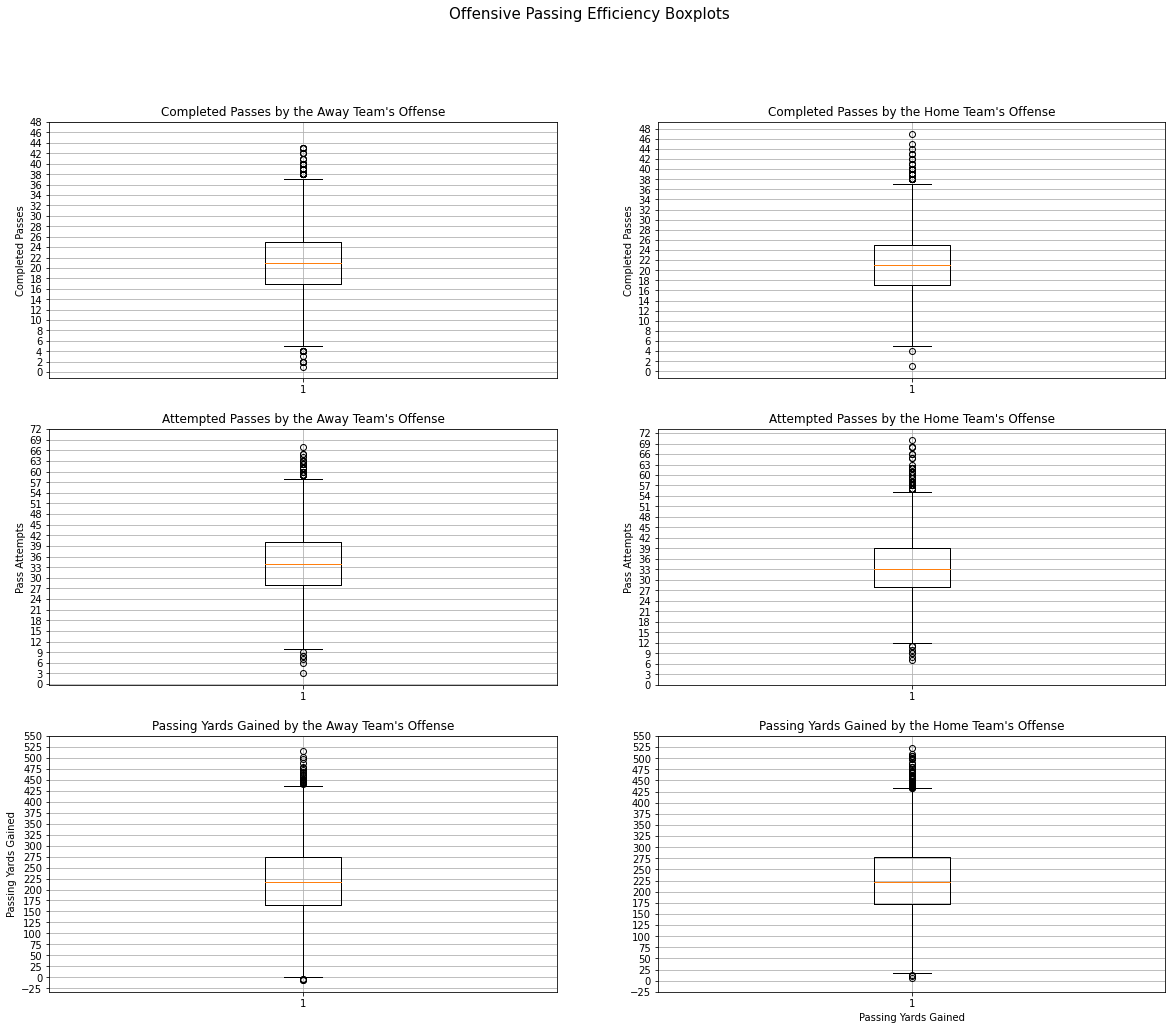

In [32]:
passingBoxplots = side_by_side_Boxplot_grid2('Offensive Passing Efficiency Boxplots',
                                             'passing_completions_away', list(range(0, 50, 2)), "Completed Passes by the Away Team's Offense", 
                                             'passing_completions_home', list(range(0, 50, 2)), "Completed Passes by the Home Team's Offense", 
                                             'passing_attempts_away', list(range(0, 75, 3)), "Attempted Passes by the Away Team's Offense", 
                                             'passing_attempts_home', list(range(0, 75, 3)), "Attempted Passes by the Home Team's Offense", 
                                             'passing_yards_away', list(range(-25, 575, 25)), "Passing Yards Gained by the Away Team's Offense", 
                                             'passing_yards_home', list(range(-25, 575, 25)), "Passing Yards Gained by the Home Team's Offense", 
                                             (20,16), ["Completed Passes", "Pass Attempts", "Passing Yards Gained"])
plt.savefig("OffensivePassingEfficiencyBoxplots.jpeg")

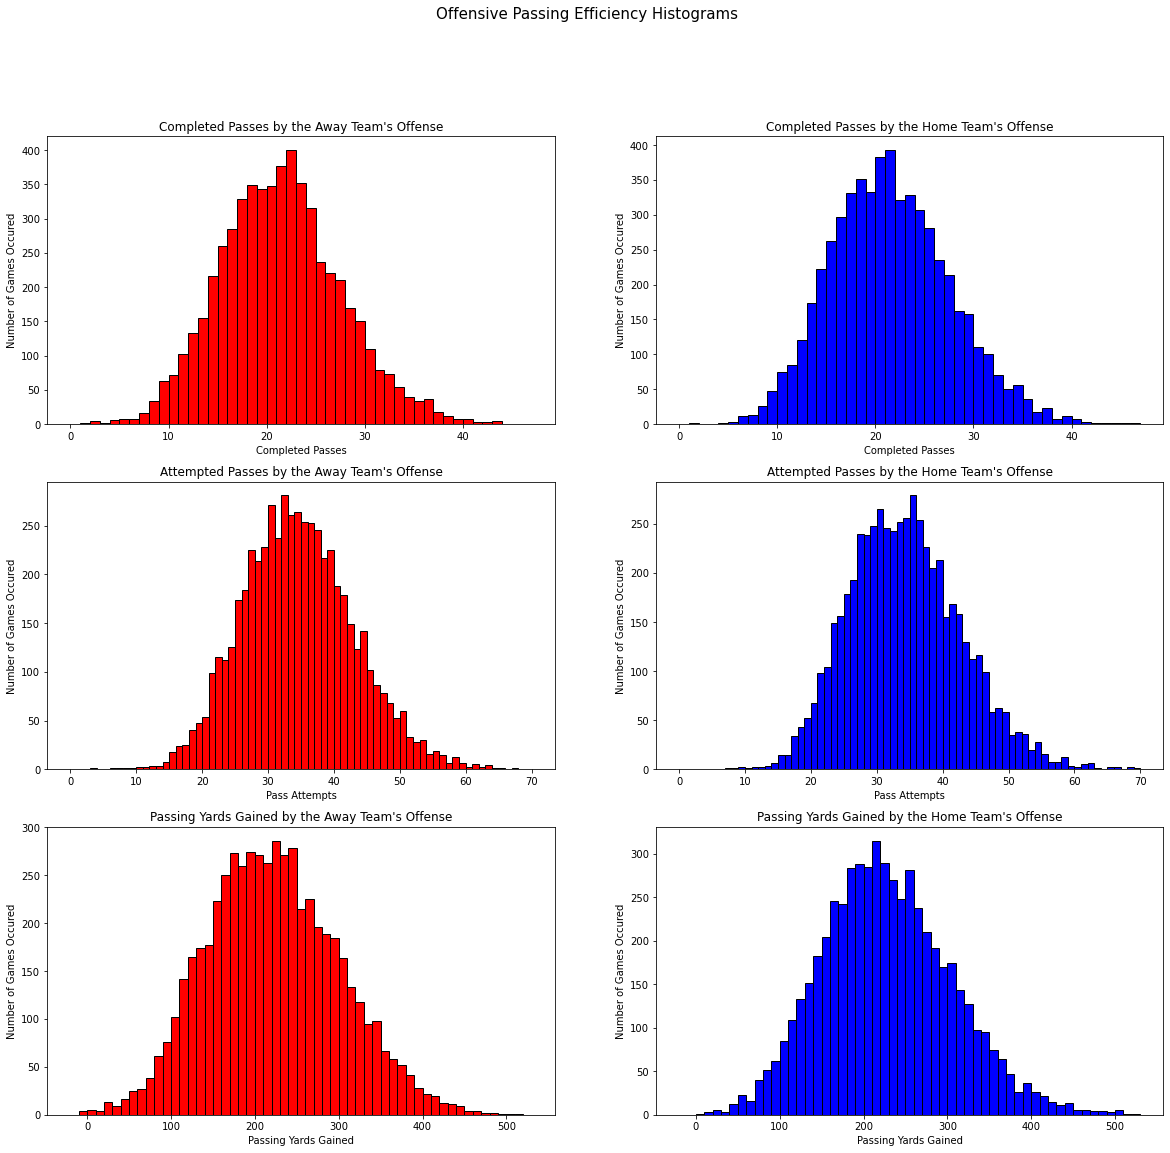

In [33]:
passingHistogram = side_by_side_histogram_grid2('Offensive Passing Efficiency Histograms',
                                                'passing_completions_away', list(range(0, 48, 1)), "Completed Passes by the Away Team's Offense", 
                                                'passing_completions_home', list(range(0, 48, 1)), "Completed Passes by the Home Team's Offense", 
                                                'passing_attempts_away', list(range(0, 71, 1)), "Attempted Passes by the Away Team's Offense", 
                                                'passing_attempts_home', list(range(0, 71, 1)), "Attempted Passes by the Home Team's Offense", 
                                                'passing_yards_away', list(range(-20, 540, 10)), "Passing Yards Gained by the Away Team's Offense", 
                                                'passing_yards_home', list(range(-20, 540, 10)), "Passing Yards Gained by the Home Team's Offense", 
                                                (20,18), ["Completed Passes", "Pass Attempts", "Passing Yards Gained"], 'Number of Games Occured', 'red', 'blue')
plt.savefig("OffensivePassingEfficiencyHistograms.jpeg")

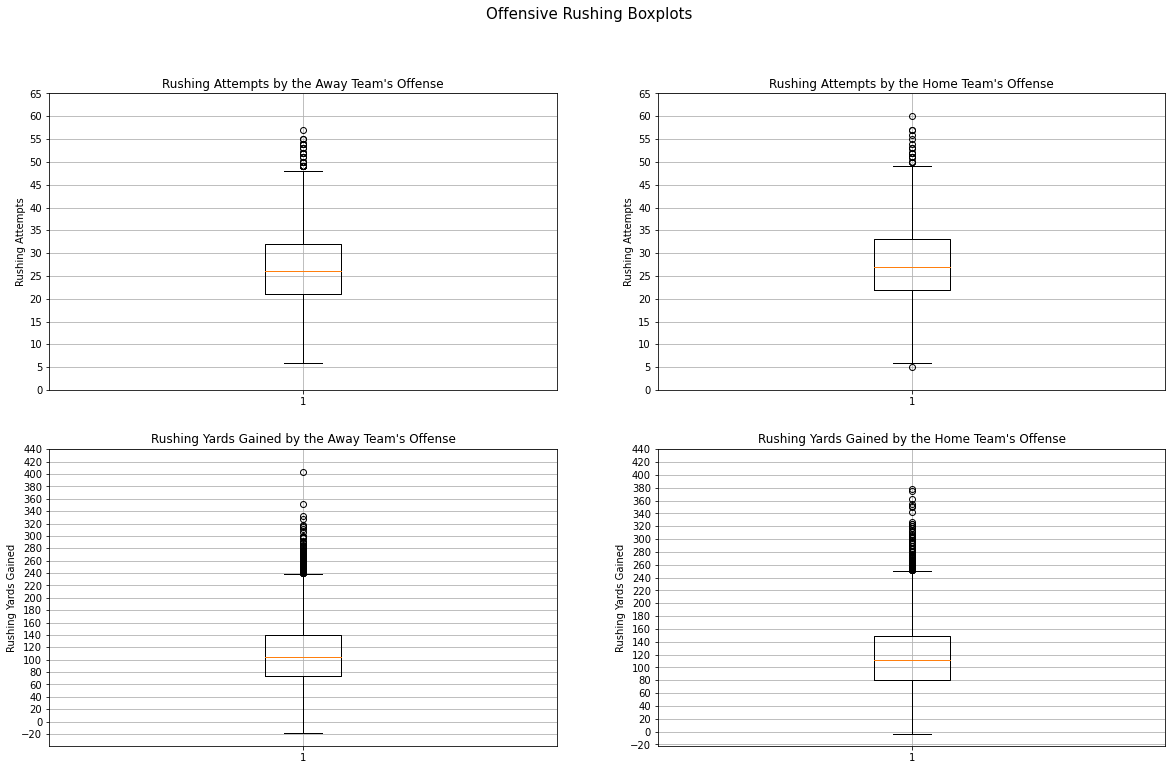

In [34]:
runningBoxplots = side_by_side_Boxplot_grid1('Offensive Rushing Boxplots',
                                             'rushing_attempts_away', list(range(0,70,5)), "Rushing Attempts by the Away Team's Offense",
                                             'rushing_attempts_home', list(range(0,70,5)), "Rushing Attempts by the Home Team's Offense",
                                             'rushing_yards_away', list(range(-20,460,20)), "Rushing Yards Gained by the Away Team's Offense",
                                             'rushing_yards_home', list(range(-20,460,20)), "Rushing Yards Gained by the Home Team's Offense",
                                             (20,12), ['Rushing Attempts', 'Rushing Yards Gained'])
plt.savefig("OffensiveRushingBoxplots.jpeg")

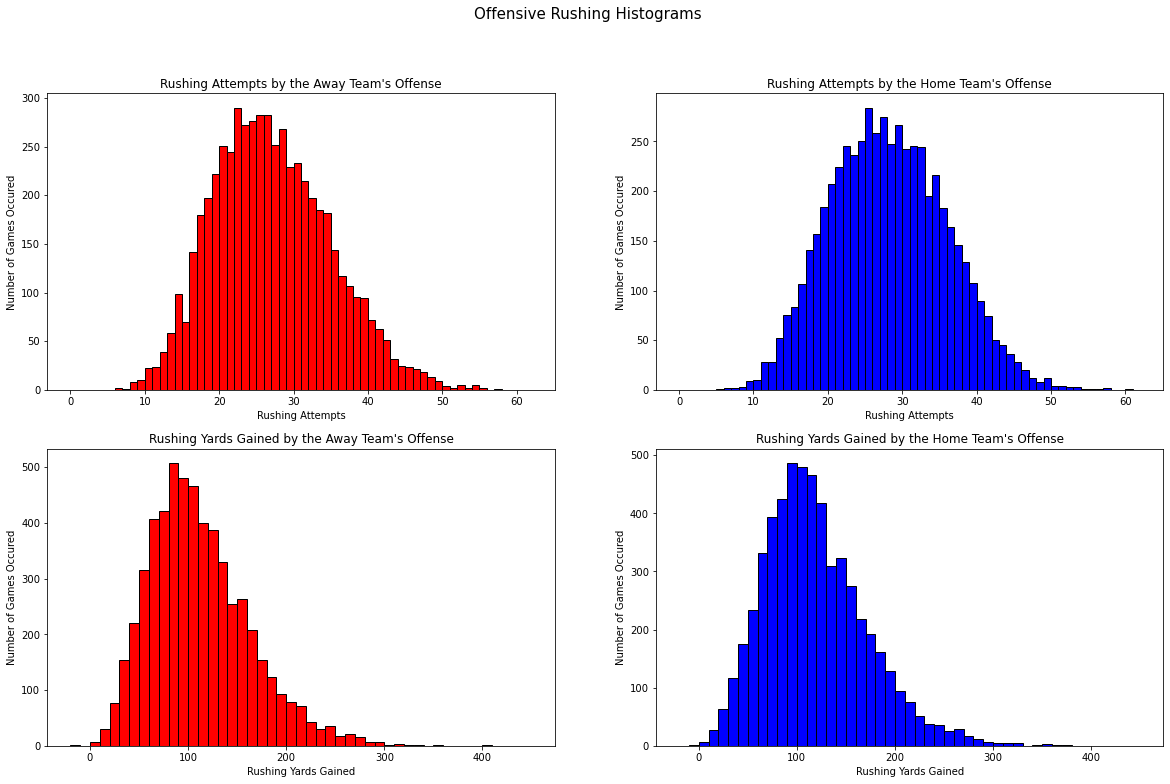

In [35]:
rushingHistogram = side_by_side_histogram_grid1('Offensive Rushing Histograms',
                                                'rushing_attempts_away', list(range(0,63,1)), "Rushing Attempts by the Away Team's Offense",
                                                'rushing_attempts_home', list(range(0,63,1)), "Rushing Attempts by the Home Team's Offense",
                                                'rushing_yards_away', list(range(-20,460,10)), "Rushing Yards Gained by the Away Team's Offense",
                                                'rushing_yards_home', list(range(-20,460,10)), "Rushing Yards Gained by the Home Team's Offense",
                                                (20,12), ['Rushing Attempts', 'Rushing Yards Gained'], 'Number of Games Occured', 'red', 'blue')
plt.savefig("OffensiveRushingHistograms.jpeg")

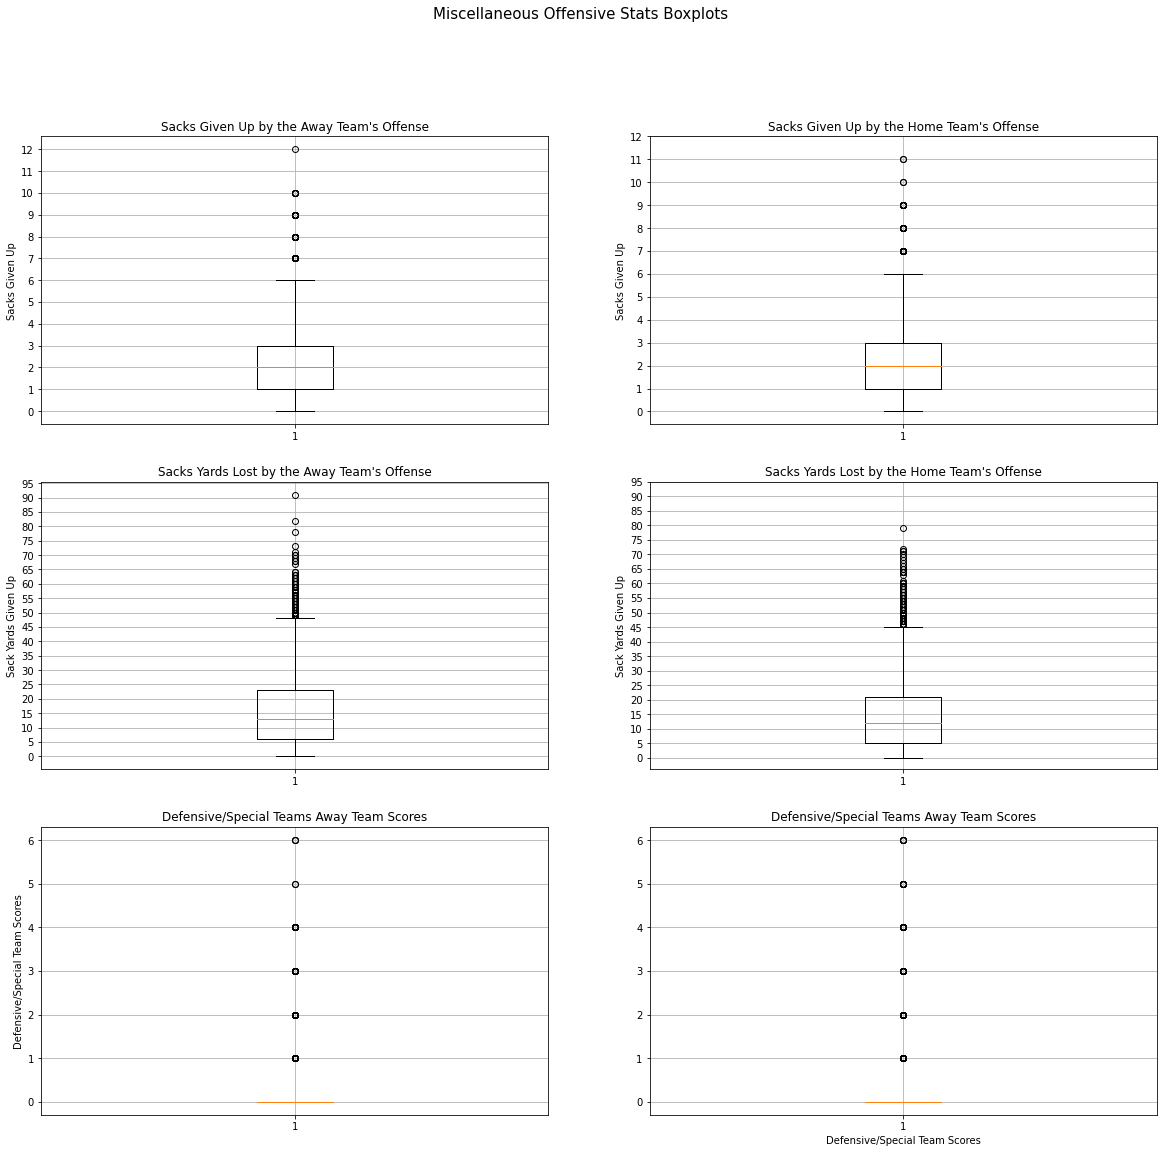

In [36]:
miscellaneousStats_Boxplots = side_by_side_Boxplot_grid2('Miscellaneous Offensive Stats Boxplots',
                                                         'times_sacked_away', list(range(0,13,1)), "Sacks Given Up by the Away Team's Offense",
                                                         'times_sacked_home', list(range(0,13,1)), "Sacks Given Up by the Home Team's Offense",
                                                         'sack_yards_lost_away', list(range(0,100,5)), "Sacks Yards Lost by the Away Team's Offense",
                                                         'sack_yards_lost_home', list(range(0,100,5)), "Sacks Yards Lost by the Home Team's Offense",
                                                         'def_st_td_away', list(range(0,7,1)), "Defensive/Special Teams Away Team Scores",
                                                         'def_st_td_home', list(range(0,7,1)), "Defensive/Special Teams Away Team Scores", 
                                                         (20,18), ['Sacks Given Up', 'Sack Yards Given Up', 'Defensive/Special Team Scores'])
plt.savefig("MiscellaneousOffensiveStatsBoxplots.jpeg")

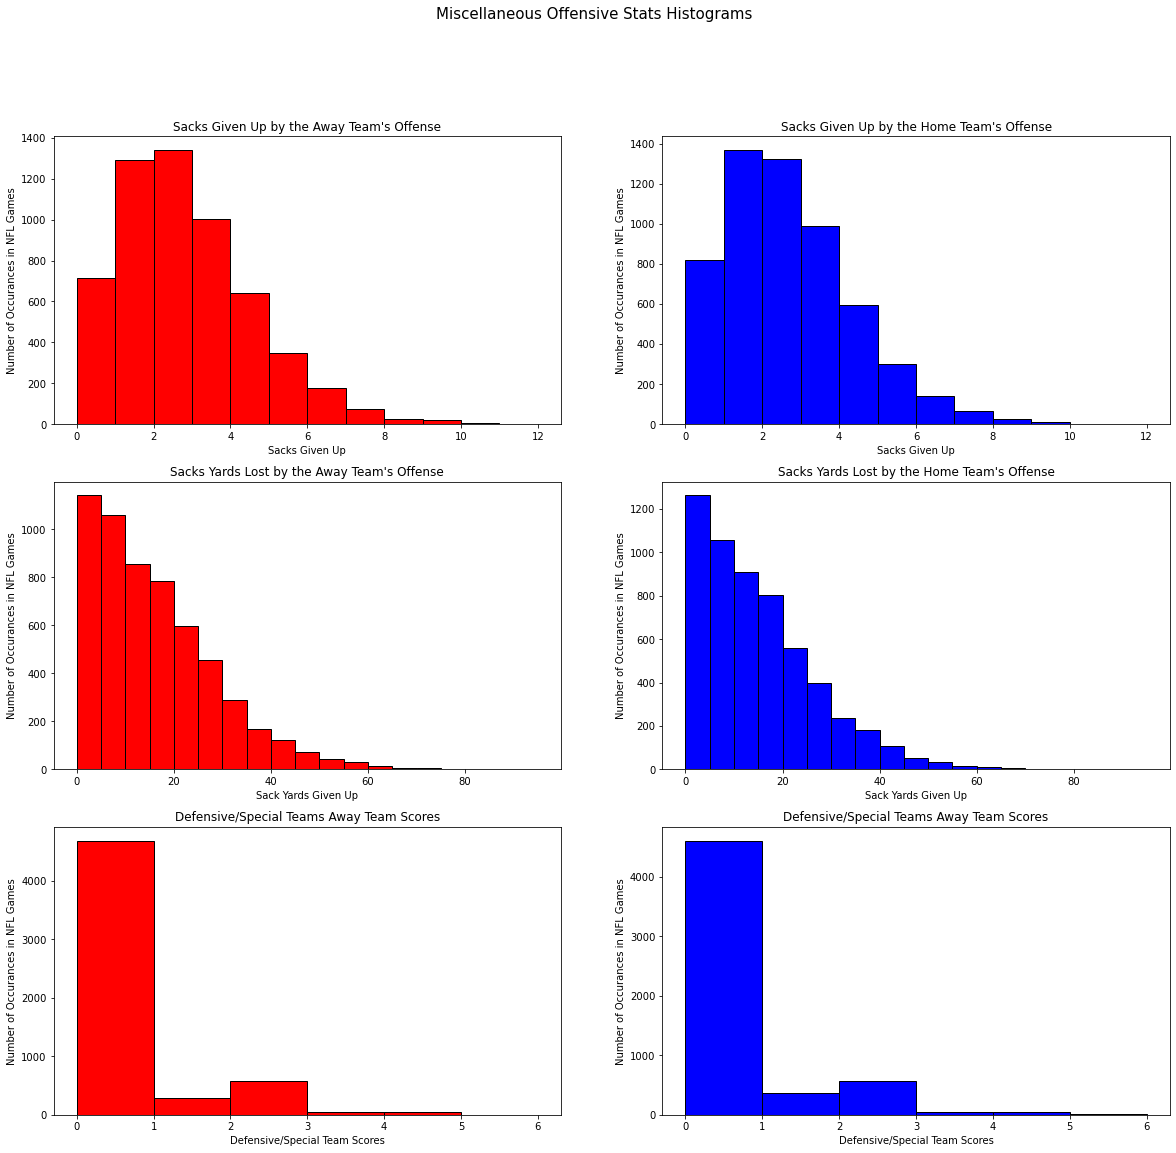

In [37]:
miscellaneousStats_Histogram = side_by_side_histogram_grid2('Miscellaneous Offensive Stats Histograms',
                                                            'times_sacked_away', list(range(0,13,1)), "Sacks Given Up by the Away Team's Offense",
                                                            'times_sacked_home', list(range(0,13,1)), "Sacks Given Up by the Home Team's Offense",
                                                            'sack_yards_lost_away', list(range(0,100,5)), "Sacks Yards Lost by the Away Team's Offense",
                                                            'sack_yards_lost_home', list(range(0,100,5)), "Sacks Yards Lost by the Home Team's Offense",
                                                            'def_st_td_away', list(range(0,7,1)), "Defensive/Special Teams Away Team Scores",
                                                            'def_st_td_home', list(range(0,7,1)), "Defensive/Special Teams Away Team Scores", 
                                                            (20,18), ['Sacks Given Up', 'Sack Yards Given Up', 'Defensive/Special Team Scores'],
                                                            'Number of Occurances in NFL Games', 'red', 'blue')
plt.savefig("MiscellaneousOffensiveStatsHistograms.jpeg")

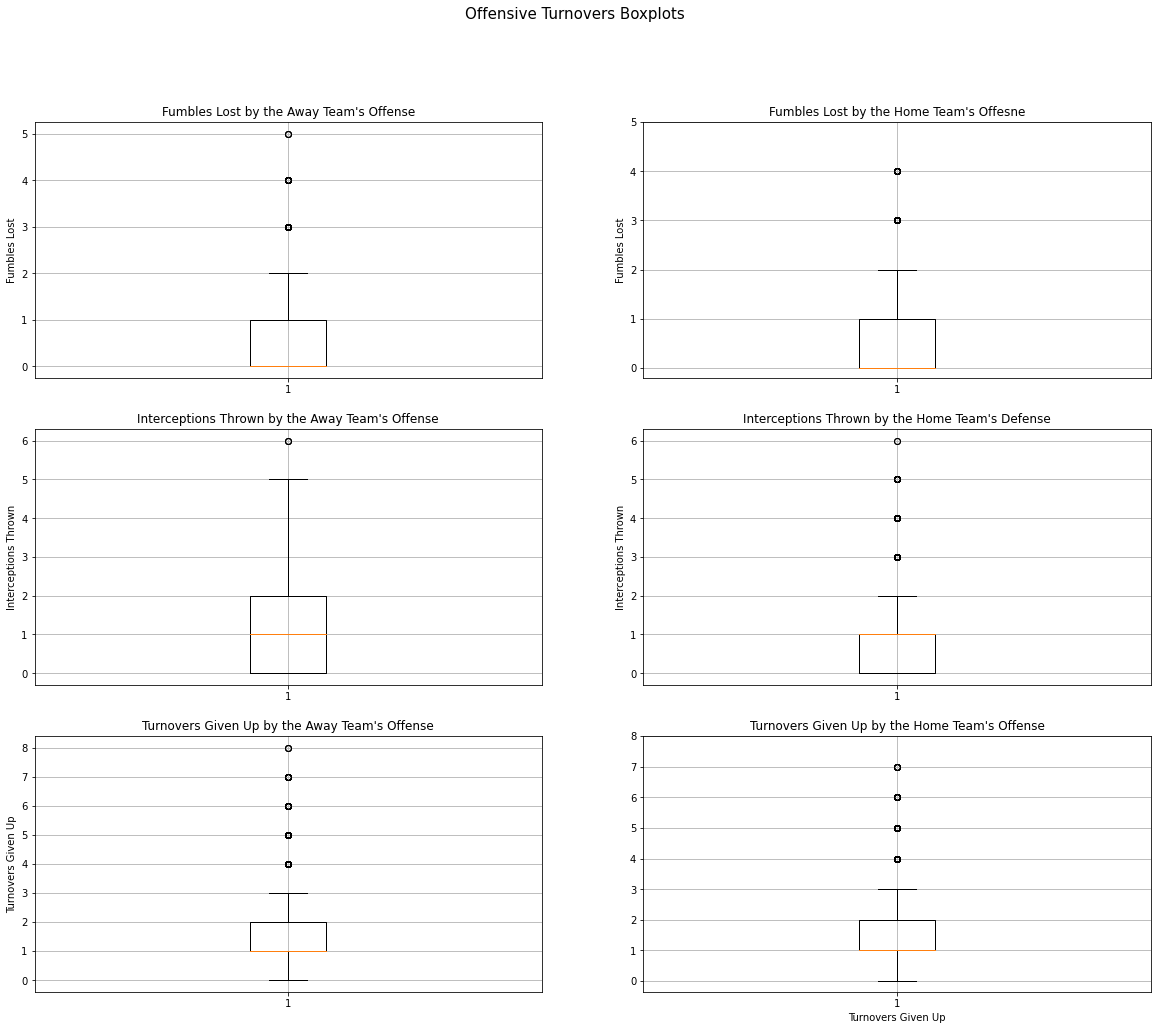

In [38]:
turnoverBoxplots = side_by_side_Boxplot_grid2('Offensive Turnovers Boxplots',
                                              'fumbles_away', list(range(0,6,1)), "Fumbles Lost by the Away Team's Offense",
                                              'fumbles_home', list(range(0,6,1)), "Fumbles Lost by the Home Team's Offesne",
                                              'int_away', list(range(0,7,1)), "Interceptions Thrown by the Away Team's Offense",
                                              'int_home', list(range(0,7,1)), "Interceptions Thrown by the Home Team's Defense",
                                              'turnovers_away', list(range(0,9,1)), "Turnovers Given Up by the Away Team's Offense",
                                              'turnovers_home', list(range(0,9,1)), "Turnovers Given Up by the Home Team's Offense",
                                              (20,16), ["Fumbles Lost", "Interceptions Thrown", "Turnovers Given Up"])
plt.savefig("OffensiveTurnoversBoxplots.jpeg")

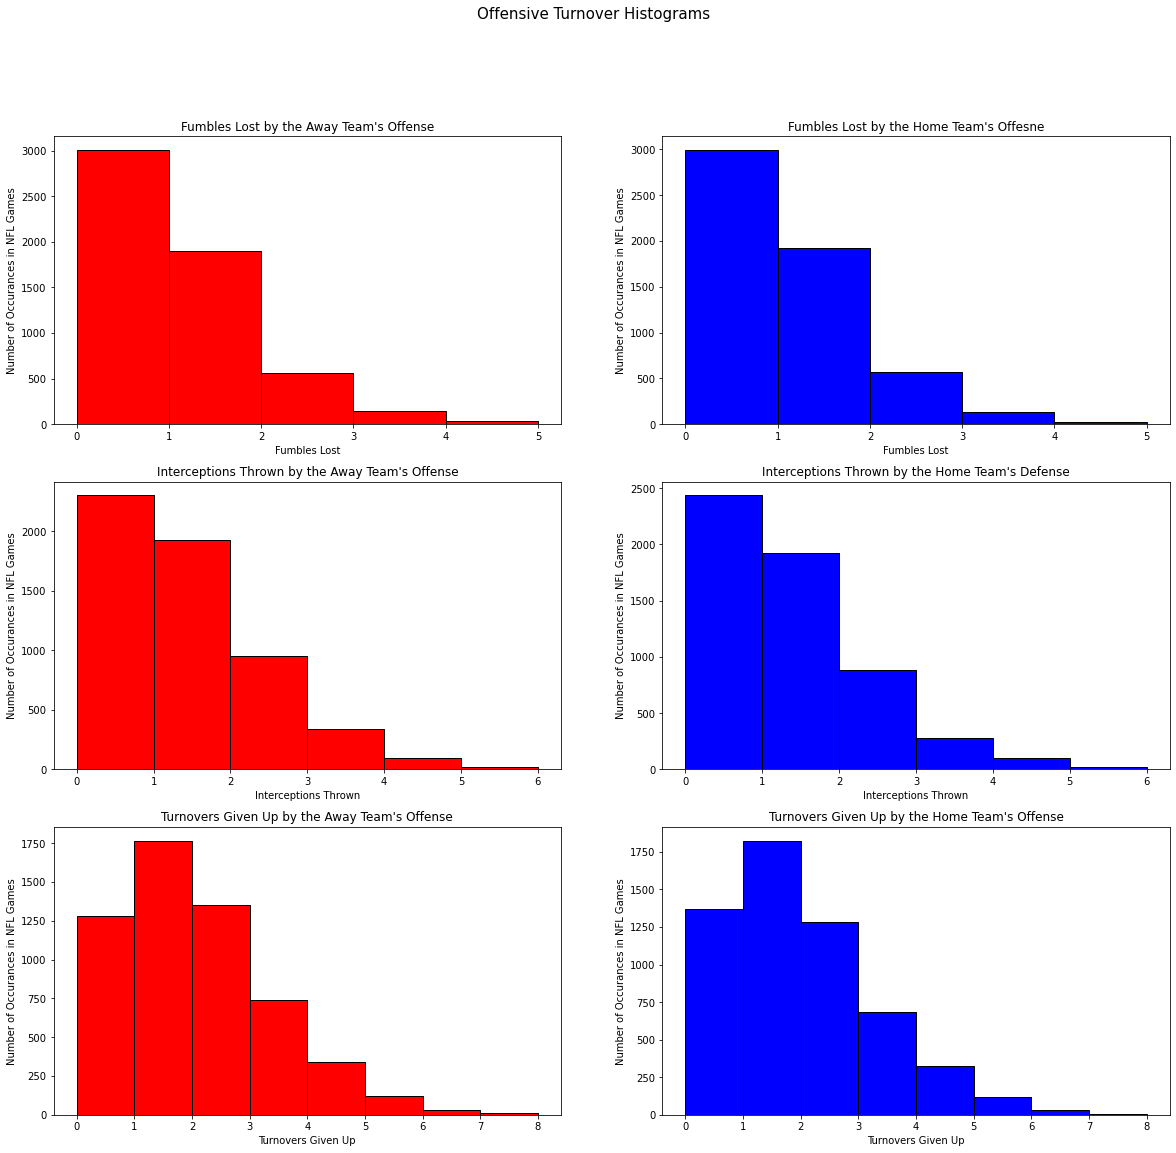

In [39]:
turnoverHistogram = side_by_side_histogram_grid2('Offensive Turnover Histograms',
                                                 'fumbles_away', list(range(0,6,1)), "Fumbles Lost by the Away Team's Offense",
                                                 'fumbles_home', list(range(0,6,1)), "Fumbles Lost by the Home Team's Offesne",
                                                 'int_away', list(range(0,7,1)), "Interceptions Thrown by the Away Team's Offense",
                                                 'int_home', list(range(0,7,1)), "Interceptions Thrown by the Home Team's Defense",
                                                 'turnovers_away', list(range(0,9,1)), "Turnovers Given Up by the Away Team's Offense",
                                                 'turnovers_home', list(range(0,9,1)), "Turnovers Given Up by the Home Team's Offense",
                                                 (20,18), ["Fumbles Lost", "Interceptions Thrown", "Turnovers Given Up"], "Number of Occurances in NFL Games",
                                                 'red', 'blue')
plt.savefig("OffensiveTurnoverHistograms.jpeg")

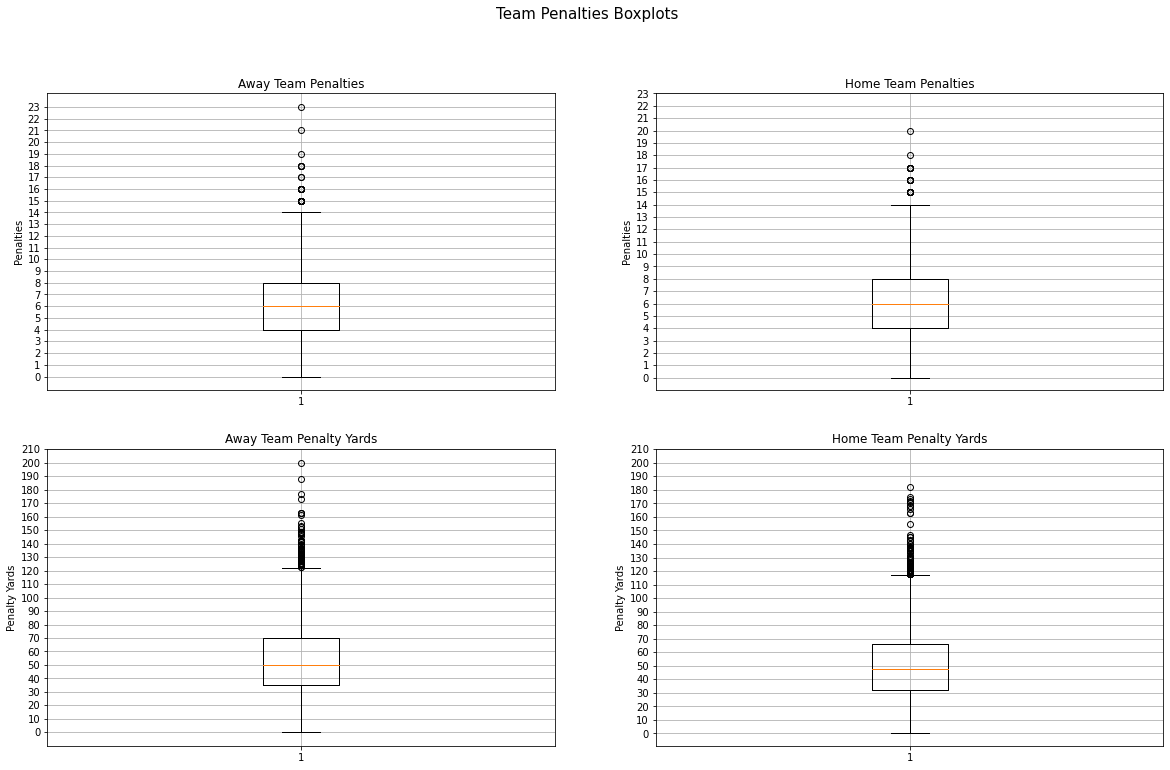

In [40]:
teamPenalty_Boxplot = side_by_side_Boxplot_grid1('Team Penalties Boxplots',
                                                 'team_penalties_away', list(range(0,24,1)), 'Away Team Penalties',
                                                 'team_penalties_home', list(range(0,24,1)), 'Home Team Penalties',
                                                 'penalty_yards_away', list(range(0,220,10)), 'Away Team Penalty Yards',
                                                 'penalty_yards_home', list(range(0,220,10)), 'Home Team Penalty Yards',
                                                 (20,12), ["Penalties", "Penalty Yards"])
plt.savefig("TeamPenaltiesBoxplots.jpeg")

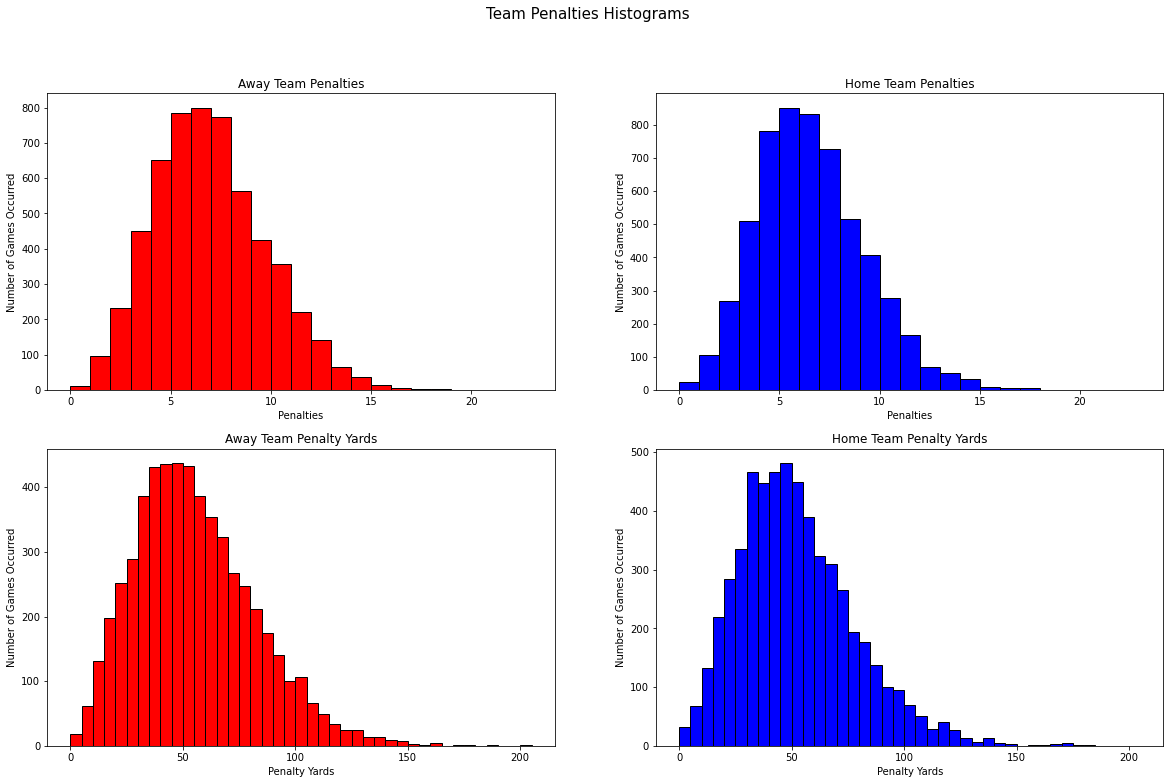

In [41]:
teamPenalty_Histogram = side_by_side_histogram_grid1('Team Penalties Histograms',
                                                     'team_penalties_away', list(range(0,24,1)), 'Away Team Penalties',
                                                     'team_penalties_home', list(range(0,24,1)), 'Home Team Penalties',
                                                     'penalty_yards_away', list(range(0,210,5)), 'Away Team Penalty Yards',
                                                     'penalty_yards_home', list(range(0,210,5)), 'Home Team Penalty Yards',
                                                     (20,12), ["Penalties", "Penalty Yards"], 'Number of Games Occurred', 'red', 'blue')
plt.savefig("TeamPenaltiesHistograms.jpeg")

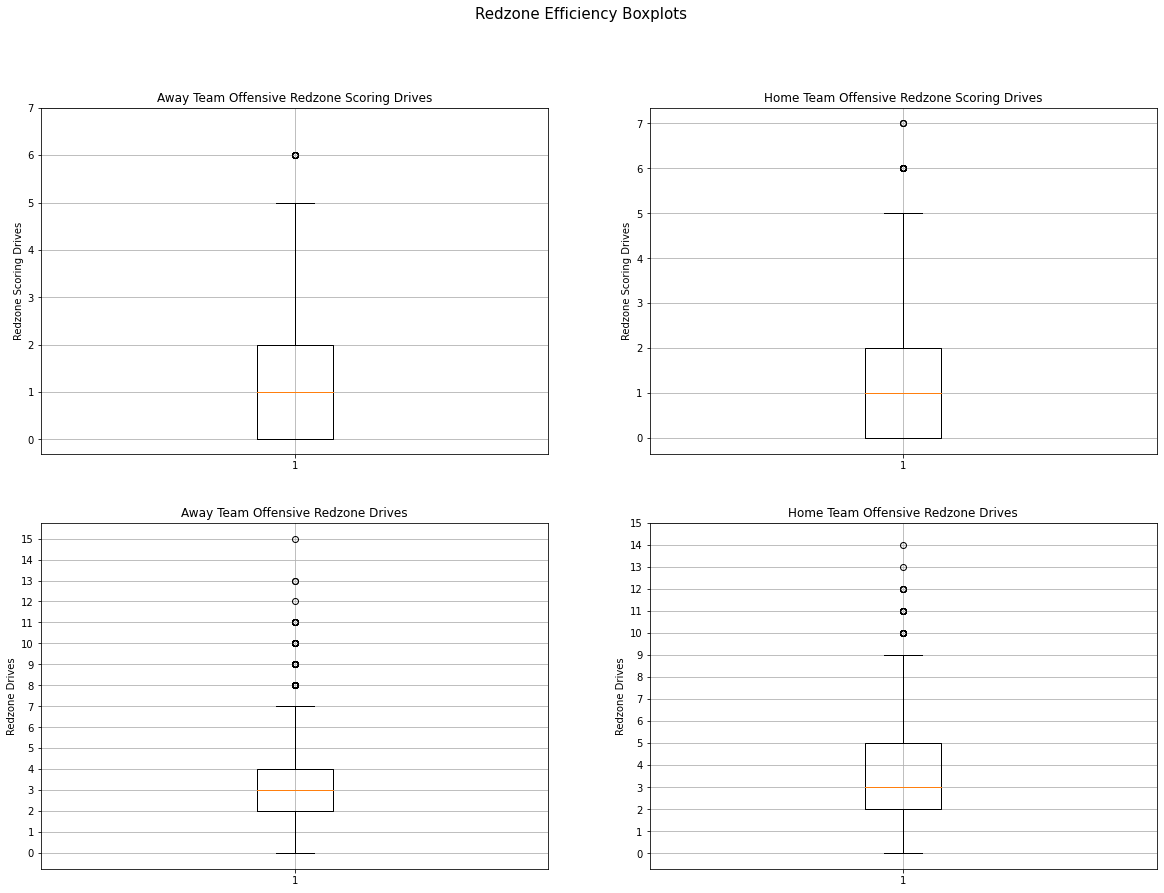

In [42]:
redzoneEfficiency_Boxplot = side_by_side_Boxplot_grid1("Redzone Efficiency Boxplots",
                                                       'redzone_conversions_away', list(range(0,8,1)), "Away Team Offensive Redzone Scoring Drives",
                                                       'redzone_conversions_home', list(range(0,8,1)), "Home Team Offensive Redzone Scoring Drives",
                                                       'redzone_opportunities_away', list(range(0,16,1)), "Away Team Offensive Redzone Drives",
                                                       'redzone_opportunities_home', list(range(0,16,1)), "Home Team Offensive Redzone Drives",
                                                       (20,14), ['Redzone Scoring Drives', 'Redzone Drives'])
plt.savefig("RedzoneEfficiencyBoxplots.jpeg")

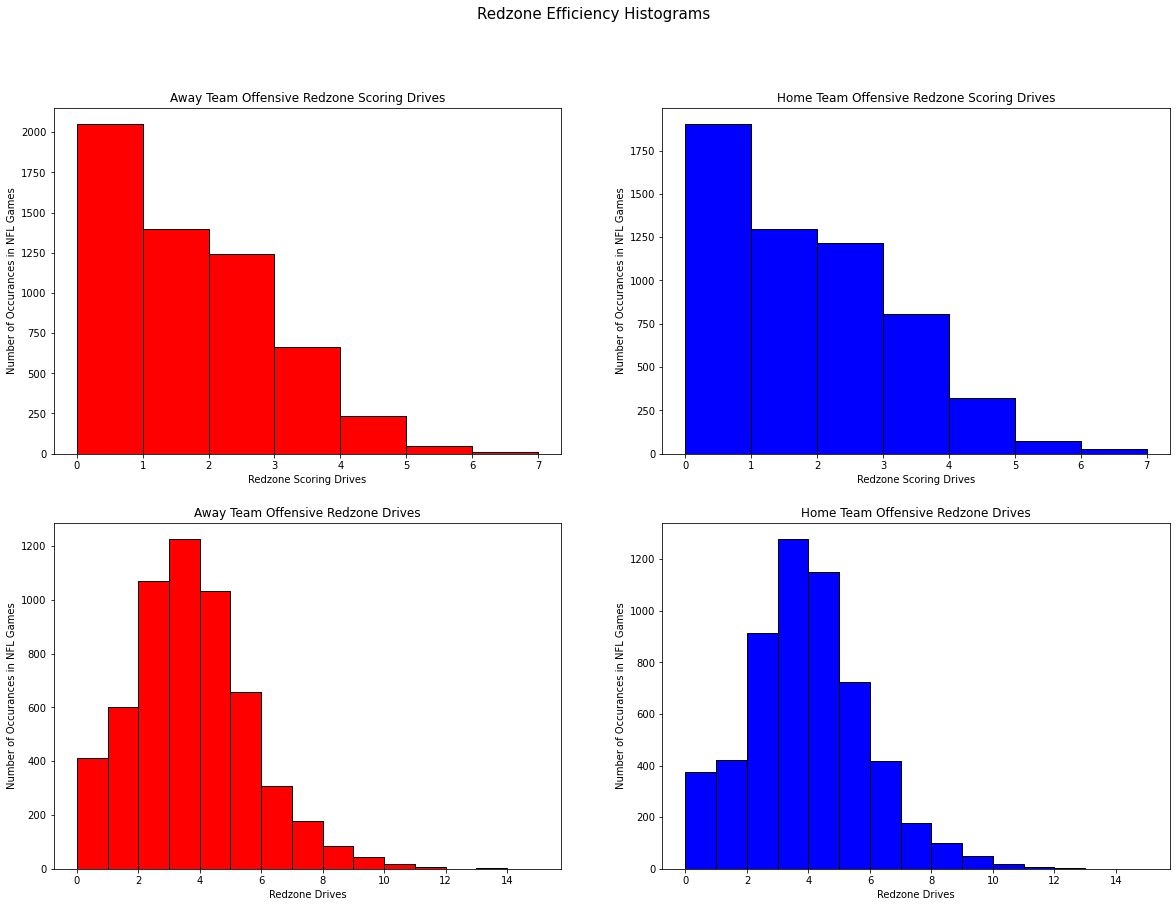

In [43]:
redzoneEfficiency_histogram = side_by_side_histogram_grid1("Redzone Efficiency Histograms",
                                                           'redzone_conversions_away', list(range(0,8,1)), "Away Team Offensive Redzone Scoring Drives",
                                                           'redzone_conversions_home', list(range(0,8,1)), "Home Team Offensive Redzone Scoring Drives",
                                                           'redzone_opportunities_away', list(range(0,16,1)), "Away Team Offensive Redzone Drives",
                                                           'redzone_opportunities_home', list(range(0,16,1)), "Home Team Offensive Redzone Drives",
                                                           (20,14), ['Redzone Scoring Drives', 'Redzone Drives'],
                                                           'Number of Occurances in NFL Games', 'red', 'blue')
plt.savefig("RedzoneEfficiencyHistograms.jpeg")

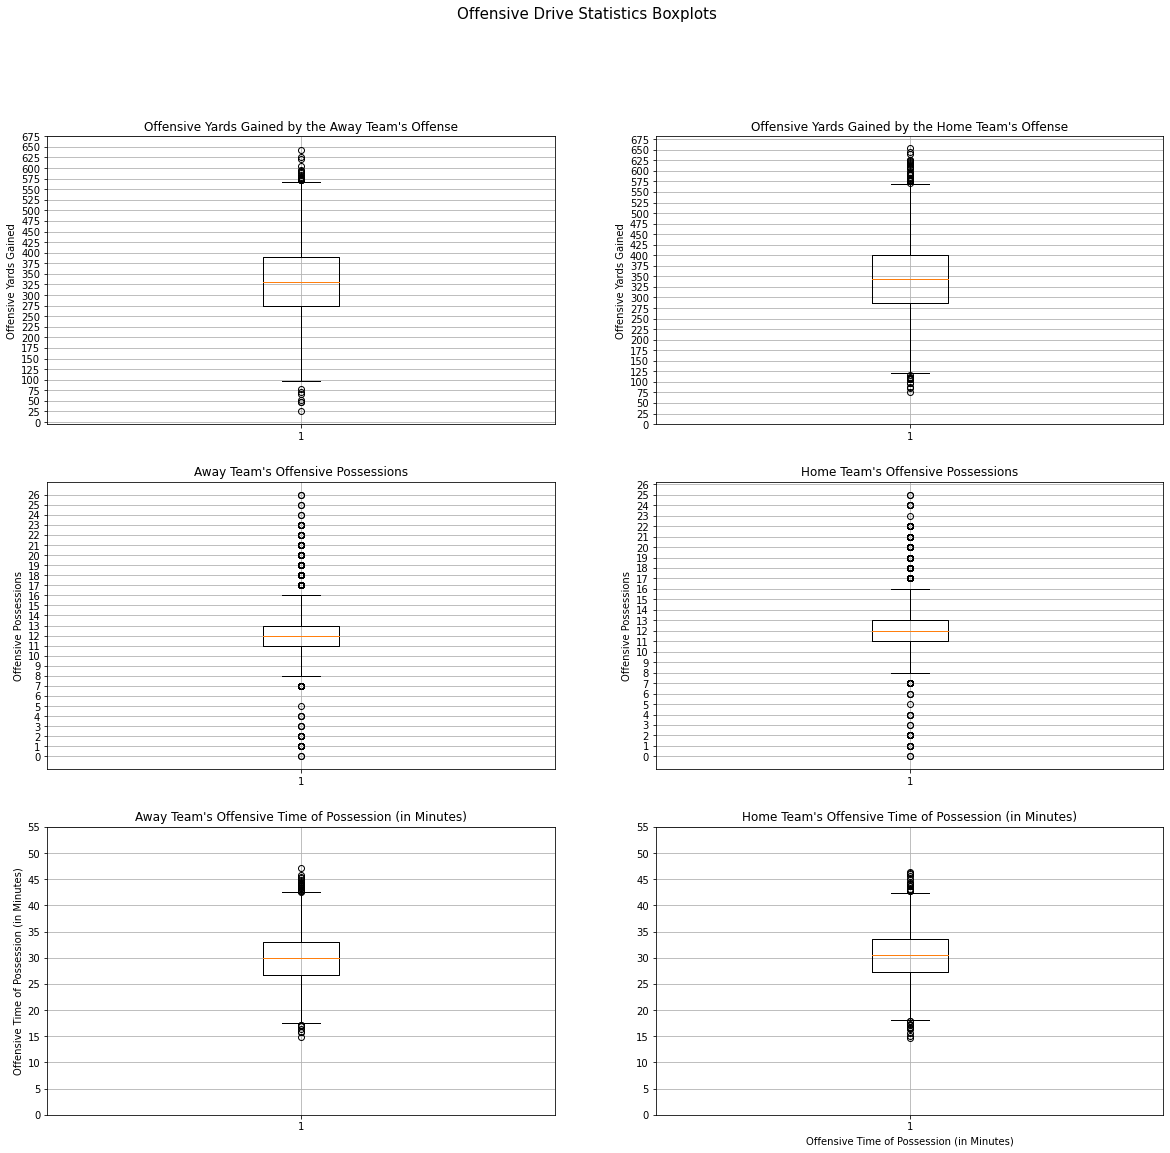

In [44]:
offensiveDrive_Histograms =  side_by_side_Boxplot_grid2('Offensive Drive Statistics Boxplots',
                                                        'total_yards_away', list(range(0,700,25)), "Offensive Yards Gained by the Away Team's Offense",
                                                        'total_yards_home', list(range(0,700,25)), "Offensive Yards Gained by the Home Team's Offense",
                                                        'drives_away', list(range(0,27,1)), "Away Team's Offensive Possessions",
                                                        'drives_home', list(range(0,27,1)), "Home Team's Offensive Possessions",
                                                        'possession_away', list(range(0,60,5)), "Away Team's Offensive Time of Possession (in Minutes)",
                                                        'possession_home', list(range(0,60,5)), "Home Team's Offensive Time of Possession (in Minutes)",
                                                        (20,18), ['Offensive Yards Gained', 'Offensive Possessions', 'Offensive Time of Possession (in Minutes)'])
plt.savefig("OffensiveDriveStatisticsBoxplots.jpeg")

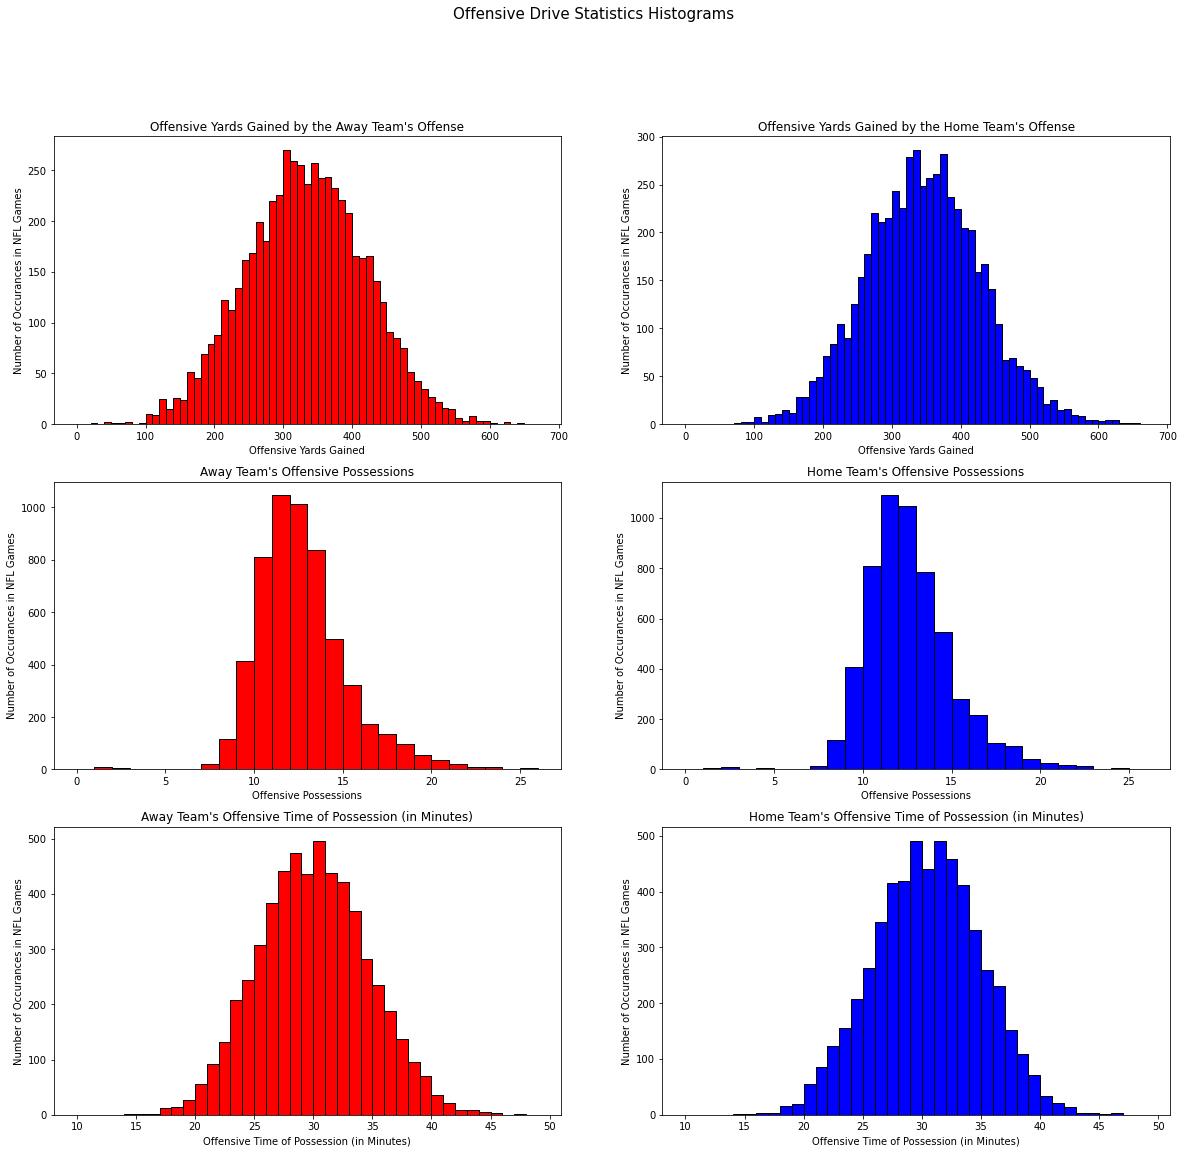

In [45]:
offensiveDrive_Histograms =  side_by_side_histogram_grid2('Offensive Drive Statistics Histograms',
                                                          'total_yards_away', list(range(0,680,10)), "Offensive Yards Gained by the Away Team's Offense",
                                                          'total_yards_home', list(range(0,680,10)), "Offensive Yards Gained by the Home Team's Offense",
                                                          'drives_away', list(range(0,27,1)), "Away Team's Offensive Possessions",
                                                          'drives_home', list(range(0,27,1)), "Home Team's Offensive Possessions",
                                                          'possession_away', list(range(10,50,1)), "Away Team's Offensive Time of Possession (in Minutes)",
                                                          'possession_home', list(range(10,50,1)), "Home Team's Offensive Time of Possession (in Minutes)",
                                                          (20,18), ['Offensive Yards Gained', 'Offensive Possessions', 'Offensive Time of Possession (in Minutes)'],
                                                          'Number of Occurances in NFL Games', 'red', 'blue')
plt.savefig("OffensiveDriveStatisticsHistograms.jpeg")

#### Year-to_Year Average Graphical Exploration

I was interested in seeing year to year averages for various team statistcs. To do so, I created a dataframe named `year_to_year_average_stats` which groups the stats the year of the same and reset the index to include the year in the index. Furthermore, I created functions called `year_to_year_averages` which shows the year to year averages for a single statistic and `year_to_year_averages_grid` to show year to year averages for multiple statistics.

In [46]:
year_to_year_average_stats = df.groupby(df.date.dt.year)[['first_downs_away',
       'third_down_conversions_away', 'third_down_opportunities_away',
       'fourth_down_conversions_away', 'fourth_down_conversion_attempts_away',
       'passing_completions_away', 'passing_attempts_away',
       'passing_yards_away', 'rushing_attempts_away', 'rushing_yards_away',
       'total_yards_away', 'times_sacked_away', 'sack_yards_lost_away',
       'fumbles_away', 'int_away', 'turnovers_away', 'team_penalties_away',
       'penalty_yards_away', 'redzone_conversions_away',
       'redzone_opportunities_away', 'def_st_td_away', 'drives_away',
       'possession_away', 'first_downs_home', 'third_down_conversions_home',
       'third_down_opportunities_home', 'fourth_down_conversions_home',
       'fourth_down_conversion_attempts_home', 'passing_completions_home',
       'passing_attempts_home', 'passing_yards_home', 'rushing_attempts_home',
       'rushing_yards_home', 'total_yards_home', 'times_sacked_home',
       'sack_yards_lost_home', 'fumbles_home', 'int_home', 'turnovers_home',
       'team_penalties_home', 'penalty_yards_home', 'redzone_conversions_home',
       'redzone_opportunities_home', 'def_st_td_home', 'drives_home',
       'possession_home', 'score_away', 'score_home']].mean()
year_to_year_average_stats.reset_index(inplace = True)
year_to_year_average_stats

,date,first_downs_away,third_down_conversions_away,third_down_opportunities_away,fourth_down_conversions_away,fourth_down_conversion_attempts_away,passing_completions_away,passing_attempts_away,passing_yards_away,rushing_attempts_away,...,turnovers_home,team_penalties_home,penalty_yards_home,redzone_conversions_home,redzone_opportunities_home,def_st_td_home,drives_home,possession_home,score_away,score_home
0,2002,18.492188,5.265625,13.492188,0.453125,0.968750,20.437500,34.214844,212.136719,26.468750,...,1.726562,6.285156,50.957031,0.000000,5.992188,0.335938,15.562500,30.876823,20.550781,22.796875
1,2003,17.543071,4.801498,13.494382,0.445693,1.044944,18.883895,32.827715,197.707865,27.134831,...,1.767790,6.243446,53.367041,0.000000,5.393258,0.423221,14.932584,30.874220,19.104869,22.940075
2,2004,18.414343,4.968127,13.282869,0.426295,0.920319,19.019920,32.099602,208.725100,27.725100,...,1.721116,6.537849,53.466135,0.000000,5.709163,0.390438,15.207171,30.181208,20.171315,22.916335
3,2005,17.977695,4.977695,13.408922,0.490706,1.022305,19.356877,32.769517,203.684015,27.066914,...,1.687732,6.806691,54.453532,0.000000,3.546468,0.312268,12.710037,30.648637,18.977695,22.401487
4,2006,17.886121,5.277580,13.658363,0.469751,0.950178,19.046263,31.996441,201.935943,28.103203,...,1.775801,5.750890,47.715302,1.423488,3.113879,0.391459,12.103203,30.172123,20.131673,21.209964
5,2007,18.244361,5.124060,13.511278,0.552632,1.116541,20.593985,33.988722,216.996241,26.552632,...,1.770677,5.345865,42.157895,1.733083,3.199248,0.518797,11.969925,30.503571,20.327068,23.199248
6,2008,18.101124,5.217228,13.288390,0.501873,0.977528,19.850187,32.782772,209.374532,26.921348,...,1.486891,5.662921,46.003745,1.846442,3.262172,0.355805,11.599251,30.450250,20.704120,23.337079
7,2009,17.872510,4.996016,13.262948,0.509960,1.055777,19.768924,32.764940,212.223108,26.844622,...,1.685259,5.832669,48.517928,1.677291,3.298805,0.362550,11.920319,30.769323,20.509960,22.482072
8,2010,18.725564,5.052632,13.263158,0.421053,0.827068,20.319549,33.496241,218.018797,27.026316,...,1.593985,6.218045,52.304511,1.812030,3.357143,0.357143,11.909774,30.489348,21.379699,23.199248
9,2011,19.029963,5.000000,13.284644,0.382022,0.917603,20.400749,34.101124,226.116105,26.816479,...,1.505618,6.273408,52.471910,1.767790,3.363296,0.449438,11.943820,30.255556,20.509363,23.501873


In [47]:
def year_to_year_averages(graphTitle, figureSize, haveGrid, xAxis_Column, yAxis_Columns, yAxisRange):
    x = np.array(year_to_year_average_stats[xAxis_Column]) #Converts column used on x axis into an array
    y = np.array(year_to_year_average_stats[yAxis_Columns]) #Converts column used on y axis into an array
    
    figure = plt.figure(figsize=figureSize) #Creates a blank figure of a specified size
    plt.plot(x,y, label = yAxis_Columns) #Creates a line graph with appropriate labels
    plt.legend(loc = "lower right") #Places legend on lower right corner
    plt.xticks(list(range(2002,2024,1)), rotation = 90) #Improves readibility of years on x axis
    plt.yticks(yAxisRange) #Sets y tick marker range
    plt.grid(haveGrid) #Places grid on graph
    plt.title(graphTitle) #Title of Graph
    
    return figure

def year_to_year_averages_grid(overallGraphTitle, titleSize, overallGraphSize, 
                               graph1_Title, graph1_haveGrid, graph1_xAxis_Column, graph1_yAxis_Columns, graph1_yAxisRange,
                               graph2_Title, graph2_haveGrid, graph2_xAxis_Column, graph2_yAxis_Columns, graph2_yAxisRange):
    
    figure = plt.figure(figsize = overallGraphSize) #Creates a blank figure of a specified size
    plt.suptitle(overallGraphTitle, size = titleSize) #Overall Title of Graph
    
    subplot1 = figure.add_subplot(121) #subplot1
    x1 = np.array(year_to_year_average_stats[graph1_xAxis_Column]) #Converts column used on x axis into an array
    y1 = np.array(year_to_year_average_stats[graph1_yAxis_Columns]) #Converts column used on y axis into an array
    
    plt.plot(x1,y1, label = graph1_yAxis_Columns) #Creates a line graph with appropriate labels
    plt.legend(loc = "upper left")  #Places legend on upper right corner
    plt.xticks(list(range(2002,2024,1)), rotation = 90) #Improves readibility of years on x axis
    plt.yticks(graph1_yAxisRange) #Sets y tick marker range
    plt.grid(graph1_haveGrid) #Places grid on subgraph
    plt.title(graph1_Title) #Title of subgraph
    
    subplot1 = figure.add_subplot(122)#subplot2
    x2 = np.array(year_to_year_average_stats[graph2_xAxis_Column]) #Converts column used on x axis into an array
    y2 = np.array(year_to_year_average_stats[graph2_yAxis_Columns]) #Converts column used on y axis into an array
    
    plt.plot(x2,y2, label = graph2_yAxis_Columns) #Creates a line graph with appropriate labels
    plt.legend(loc = "upper left") #Places legend on upper right corner
    plt.xticks(list(range(2002,2024,1)), rotation = 90) #Improves readibility of years on x axis
    plt.yticks(graph2_yAxisRange) #Sets y tick marker range
    plt.grid(graph2_haveGrid) #Places grid on subgraph
    plt.title(graph2_Title) #Title of subgraph
    
    return figure

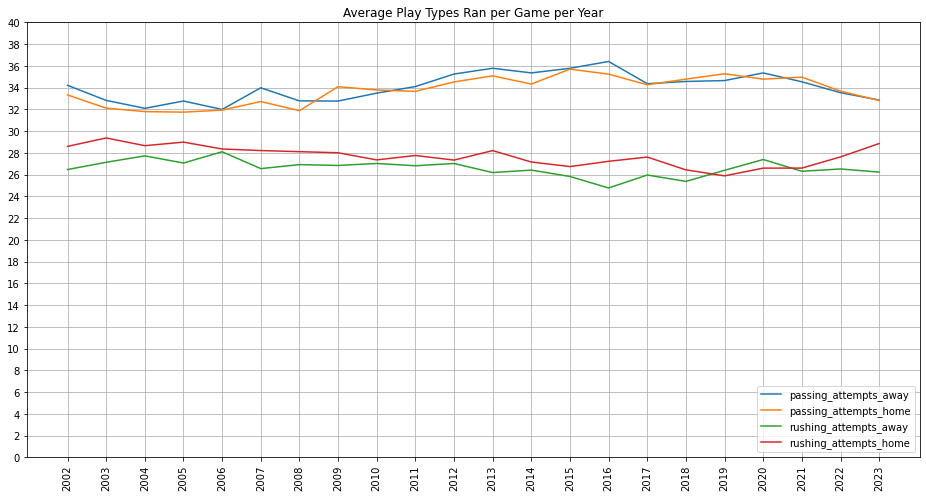

In [48]:
Play_Types_Yearly_Averages = year_to_year_averages("Average Play Types Ran per Game per Year", (16,8), True, 'date', 
                                                   ['passing_attempts_away', 'passing_attempts_home', 'rushing_attempts_away', 'rushing_attempts_home'], list(range(0,42,2)))
plt.savefig("AveragePlayTypesRanperGameperYear.jpeg")

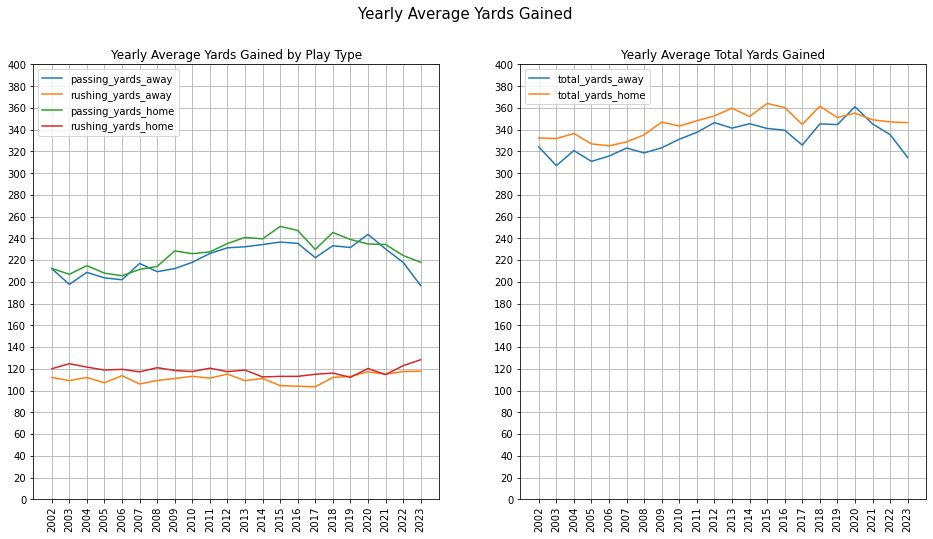

In [49]:
Yards_Gained_Yearly_Averages = year_to_year_averages_grid("Yearly Average Yards Gained", 15, (16,8), 
                                                          "Yearly Average Yards Gained by Play Type", True, "date", 
                                                          ['passing_yards_away','rushing_yards_away', 'passing_yards_home','rushing_yards_home'], 
                                                          list(range(0, 420, 20)),
                                                          "Yearly Average Total Yards Gained", True, "date", 
                                                          ['total_yards_away', 'total_yards_home'], list(range(0,420,20)))
plt.savefig("YearlyAverageYardsGained.jpeg")

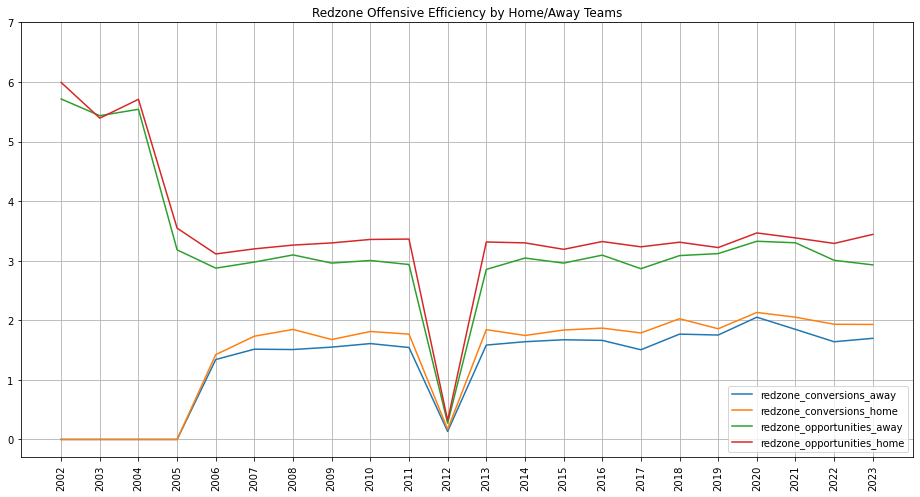

In [50]:
RedZone_Efficiency_Yearly_Averages = year_to_year_averages("Redzone Offensive Efficiency by Home/Away Teams", (16,8), True, 'date', 
                                                           ['redzone_conversions_away', 'redzone_conversions_home', 'redzone_opportunities_away','redzone_opportunities_home'], 
                                                           (range(0,8,1)))
plt.savefig("RedzoneOffensiveEfficiencybyTeams.jpeg")

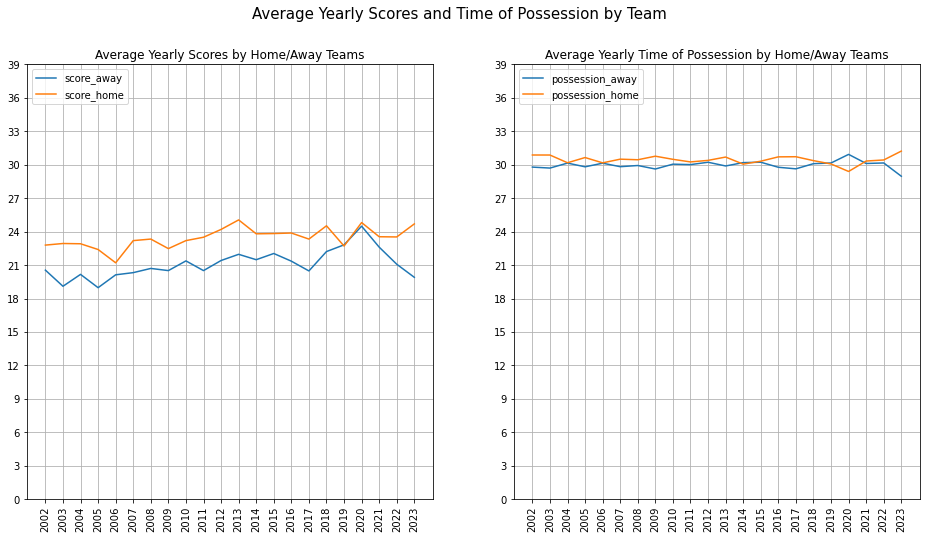

In [51]:
AverageYearlyScores =  year_to_year_averages_grid("Average Yearly Scores and Time of Possession by Team", 15, (16,8), 
                           "Average Yearly Scores by Home/Away Teams", True, 'date', ['score_away', 'score_home'], (range(0,42,3)),
                           "Average Yearly Time of Possession by Home/Away Teams", True, 'date', ['possession_away', 'possession_home'], (range(0,42,3)))
plt.savefig("AverageYearlyScoresandTimeofPossessionbyTeam.jpeg")

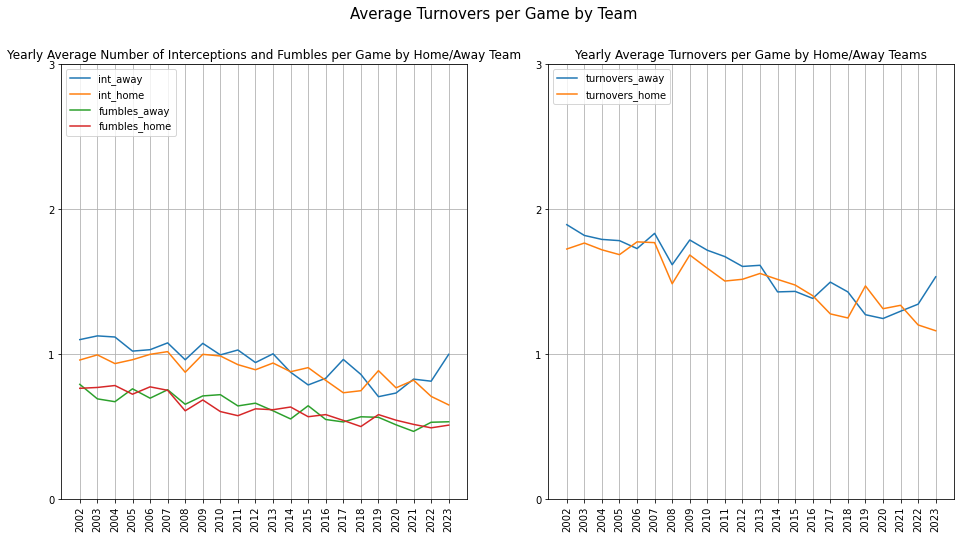

In [52]:
Yards_Gained_Yearly_Averages = year_to_year_averages_grid("Average Turnovers per Game by Team", 15, (16,8), 
                                                          "Yearly Average Number of Interceptions and Fumbles per Game by Home/Away Team", True, "date", 
                                                          ['int_away','int_home','fumbles_away','fumbles_home'], 
                                                          list(range(0, 4, 1)),
                                                          "Yearly Average Turnovers per Game by Home/Away Teams", True, "date", 
                                                          ['turnovers_away', 'turnovers_home'], list(range(0,4,1)))
plt.savefig("AverageTurnoversperGamebyTeam.jpeg")

#### Bar Graph Exploration

I was interested in seeing how various stats differ by game result. This could give further insight into comparing home and away team stats for away team wins and home team wins. To do this, I created a `win_loss_split` dataset of the various statistcs averages and grouped by the game result. I then split the varous home and away team statistics into three different graphs.

In [53]:
win_loss_split = df[['first_downs_away',
       'third_down_conversions_away', 'third_down_opportunities_away',
       'fourth_down_conversions_away', 'fourth_down_conversion_attempts_away',
       'passing_completions_away', 'passing_attempts_away',
       'passing_yards_away', 'rushing_attempts_away', 'rushing_yards_away',
       'total_yards_away', 'times_sacked_away', 'sack_yards_lost_away',
       'fumbles_away', 'int_away', 'turnovers_away', 'team_penalties_away',
       'penalty_yards_away', 'redzone_conversions_away',
       'redzone_opportunities_away', 'def_st_td_away', 'drives_away',
       'possession_away', 'first_downs_home', 'third_down_conversions_home',
       'third_down_opportunities_home', 'fourth_down_conversions_home',
       'fourth_down_conversion_attempts_home', 'passing_completions_home',
       'passing_attempts_home', 'passing_yards_home', 'rushing_attempts_home',
       'rushing_yards_home', 'total_yards_home', 'times_sacked_home',
       'sack_yards_lost_home', 'fumbles_home', 'int_home', 'turnovers_home',
       'team_penalties_home', 'penalty_yards_home', 'redzone_conversions_home',
       'redzone_opportunities_home', 'def_st_td_home', 'drives_home',
       'possession_home', 'score_away', 'score_home', 'game_result']].groupby(df.game_result).mean()

win_loss_split

,first_downs_away,third_down_conversions_away,third_down_opportunities_away,fourth_down_conversions_away,fourth_down_conversion_attempts_away,passing_completions_away,passing_attempts_away,passing_yards_away,rushing_attempts_away,rushing_yards_away,...,team_penalties_home,penalty_yards_home,redzone_conversions_home,redzone_opportunities_home,def_st_td_home,drives_home,possession_home,score_away,score_home,game_result
game_result,,,,,,,,,,,,,,,,,,,,,
0,20.617899,5.753576,13.434001,0.425828,0.662444,20.218226,31.229260,230.174091,31.540253,132.602779,...,6.345321,53.003678,1.057213,2.998365,0.158970,12.180221,28.319507,27.721700,16.970168,0.0
1,17.793396,4.535849,13.117296,0.606604,1.378931,21.406918,36.291509,214.448428,22.795283,94.117925,...,5.879560,49.274528,1.684277,3.856604,0.471069,12.106604,32.018606,16.065723,28.346541,1.0
2,23.785714,5.714286,16.071429,0.571429,0.857143,27.214286,43.428571,289.714286,30.642857,134.857143,...,7.214286,59.071429,1.285714,3.428571,0.071429,14.857143,36.050000,23.071429,23.071429,2.0


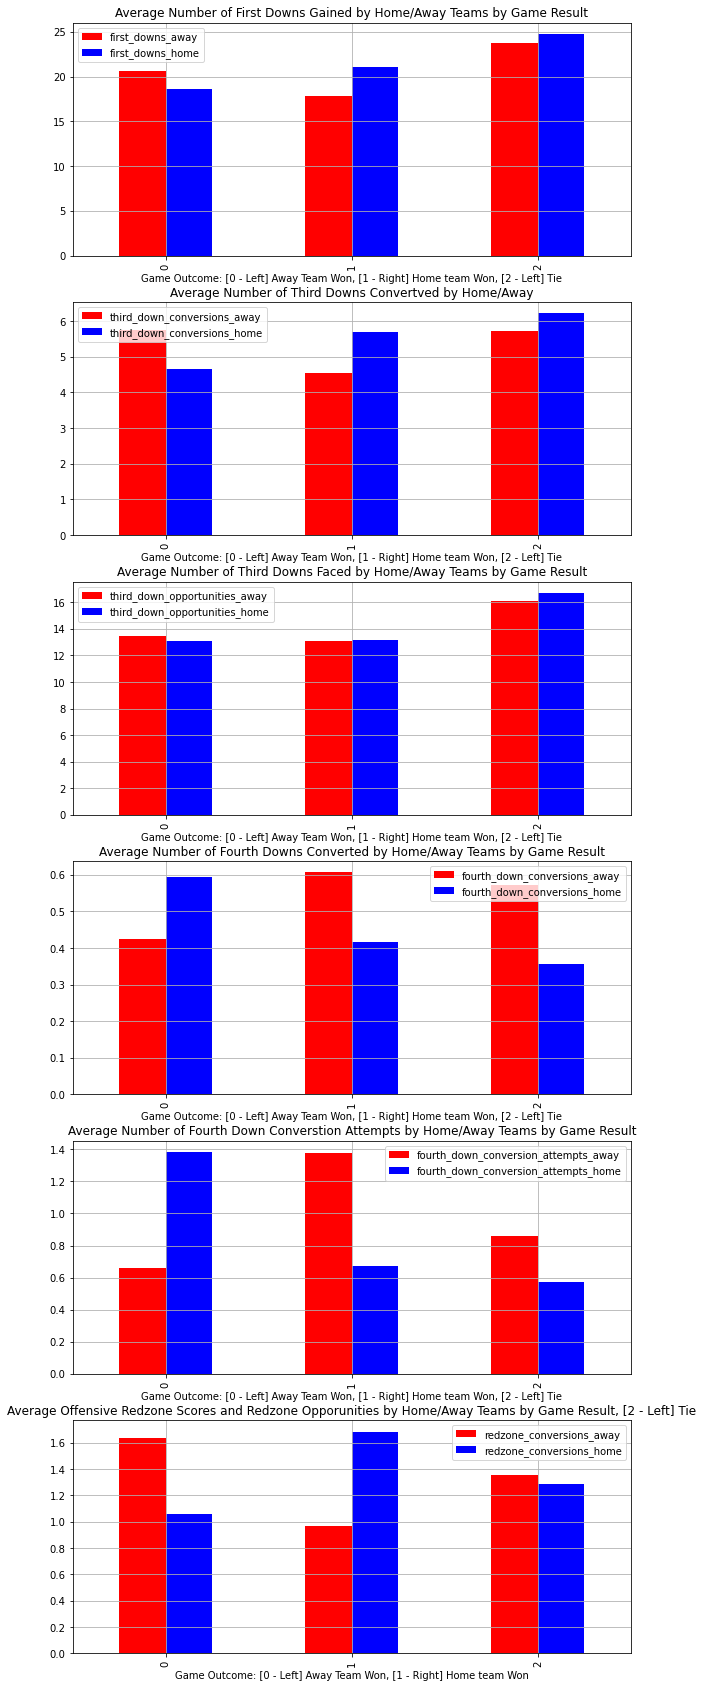

In [54]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize = (10,30))
win_loss_split[['first_downs_away', 'first_downs_home']].plot(kind='bar', 
                                                              color = ['red', 'blue'], 
                                                              ax = axes[0], 
                                                              title = "Average Number of First Downs Gained by Home/Away Teams by Game Result", 
                                                              xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won, [2 - Left] Tie",
                                                              grid=True)

win_loss_split[['third_down_conversions_away', 'third_down_conversions_home']].plot(kind='bar', 
                                                                                    color = ['red', 'blue'], 
                                                                                    ax = axes[1], 
                                                                                    title = "Average Number of Third Downs Convertved by Home/Away", 
                                                                                    xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won, [2 - Left] Tie",
                                                                                    grid = True)

win_loss_split[['third_down_opportunities_away', 'third_down_opportunities_home']].plot(kind='bar', 
                                                                                        color = ['red', 'blue'],
                                                                                        ax = axes[2], 
                                                                                        title = "Average Number of Third Downs Faced by Home/Away Teams by Game Result",
                                                                                        xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won, [2 - Left] Tie",
                                                                                        grid=True)

win_loss_split[['fourth_down_conversions_away', 'fourth_down_conversions_home']].plot(kind='bar', 
                                                                                      color = ['red', 'blue'], 
                                                                                      ax = axes[3], 
                                                                                      title = "Average Number of Fourth Downs Converted by Home/Away Teams by Game Result", 
                                                                                      xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won, [2 - Left] Tie",
                                                                                      grid=True)

win_loss_split[['fourth_down_conversion_attempts_away','fourth_down_conversion_attempts_home']].plot(kind='bar', 
                                                                                                     color = ['red', 'blue'], ax = axes[4], 
                                                                                                     title = "Average Number of Fourth Down Converstion Attempts by Home/Away Teams by Game Result", 
                                                                                                     xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won, [2 - Left] Tie",
                                                                                                     grid=True)

win_loss_split[['redzone_conversions_away', 'redzone_conversions_home']].plot(kind='bar', 
                                                                              color = ['red', 'blue'], 
                                                                              ax = axes[5],
                                                                              title = "Average Offensive Redzone Scores and Redzone Opporunities by Home/Away Teams by Game Result, [2 - Left] Tie",
                                                                              xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won",
                                                                              grid=True)


plt.savefig("Statistics_by_Game_Outcome1.jpeg")

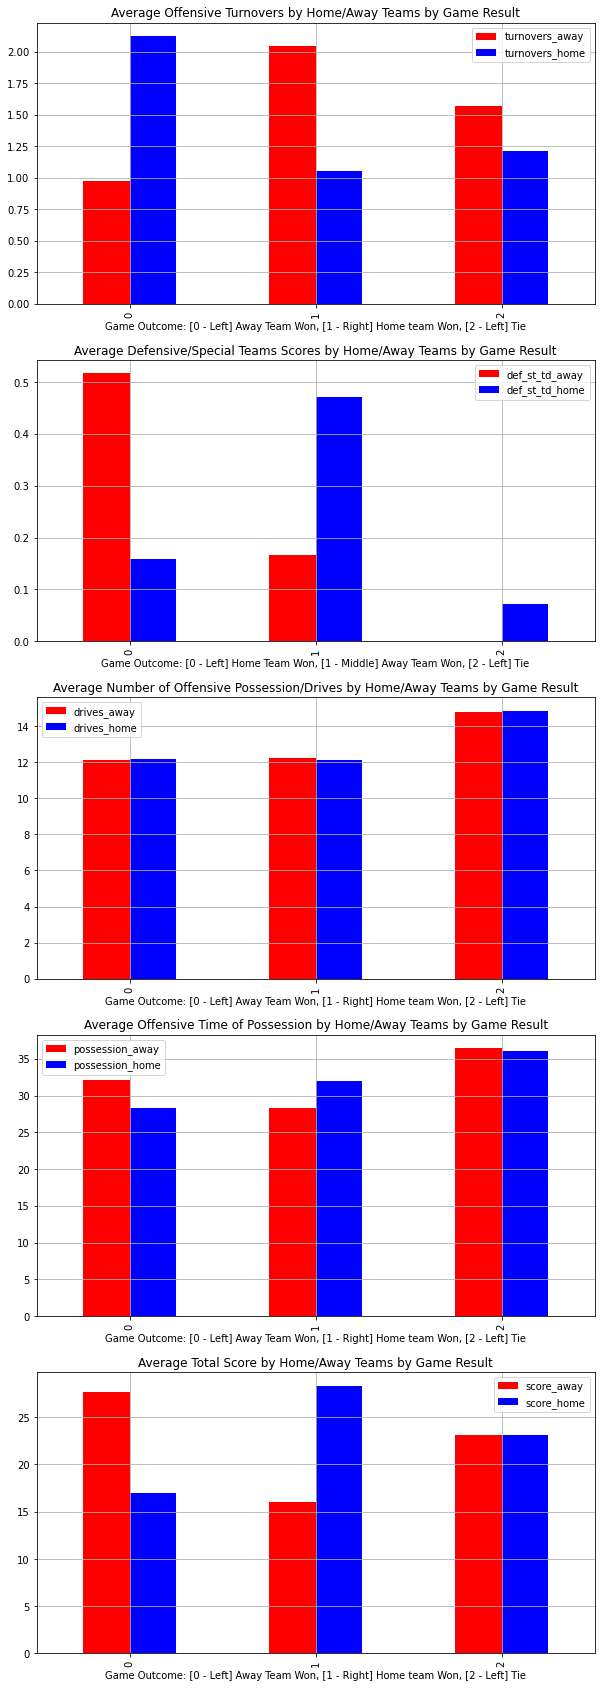

In [55]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize = (10,30))
win_loss_split[['turnovers_away','turnovers_home']].plot(kind='bar', 
                                                         color = ['red','blue'], 
                                                         ax = axes[0], 
                                                         title = "Average Offensive Turnovers by Home/Away Teams by Game Result", 
                                                         xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won, [2 - Left] Tie",
                                                         grid=True)

win_loss_split[['def_st_td_away', 'def_st_td_home']].plot(kind='bar', 
                                                          color = ['red','blue',], 
                                                          ax = axes[1],
                                                          title = "Average Defensive/Special Teams Scores by Home/Away Teams by Game Result", 
                                                          xlabel= "Game Outcome: [0 - Left] Home Team Won, [1 - Middle] Away Team Won, [2 - Left] Tie",
                                                          grid=True)

win_loss_split[['drives_away', 'drives_home']].plot(kind='bar', 
                                                    color = ['red','blue'], 
                                                    ax = axes[2],
                                                    title = "Average Number of Offensive Possession/Drives by Home/Away Teams by Game Result", 
                                                    xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won, [2 - Left] Tie",
                                                    grid=True)

win_loss_split[['possession_away', 'possession_home']].plot(kind='bar', 
                                                            color = ['red','blue'], 
                                                            ax = axes[3],
                                                            title = "Average Offensive Time of Possession by Home/Away Teams by Game Result", 
                                                            xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won, [2 - Left] Tie",
                                                            grid=True)

win_loss_split[['score_away', 'score_home']].plot(kind='bar', 
                                                  color = ['red', 'blue'], 
                                                  ax = axes[4],
                                                  title = "Average Total Score by Home/Away Teams by Game Result", 
                                                  xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won, [2 - Left] Tie",
                                                  grid=True)

plt.savefig("Statistics_by_Game_Outcome2.jpeg")

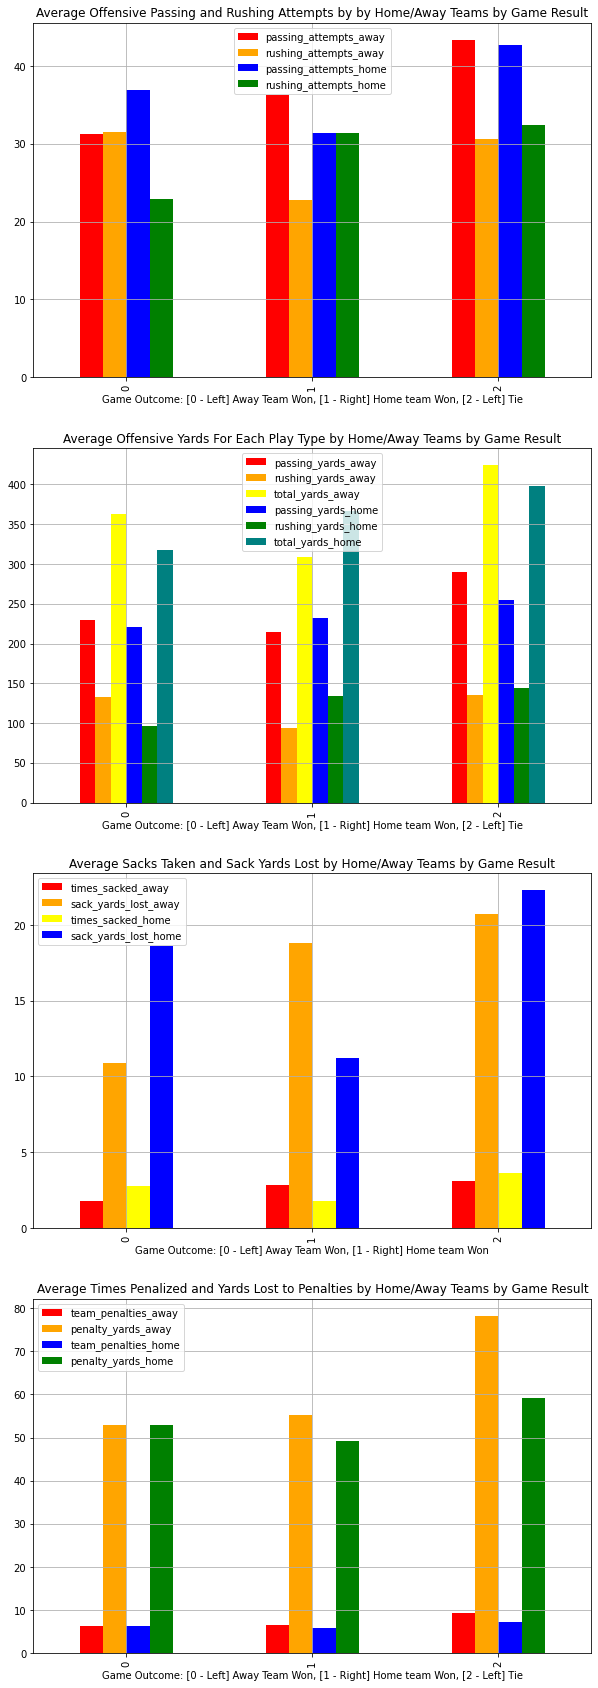

In [56]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize = (10,30))
win_loss_split[['passing_attempts_away', 'rushing_attempts_away', 'passing_attempts_home', 'rushing_attempts_home']].plot(kind='bar', 
                                                                                                                          color = ['red', 'orange', 'blue', 'green'], 
                                                                                                                          ax = axes[0],
                                                                                                                          title = "Average Offensive Passing and Rushing Attempts by by Home/Away Teams by Game Result",
                                                                                                                          xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won, [2 - Left] Tie",
                                                                                                                          grid=True)
win_loss_split[['passing_yards_away', 'rushing_yards_away', 'total_yards_away', 
                'passing_yards_home', 'rushing_yards_home', 'total_yards_home']].plot(kind='bar',
                                                                                      color = ['red', 'orange', 'yellow', 'blue', 'green', 'teal'], 
                                                                                      ax = axes[1], 
                                                                                      title = "Average Offensive Yards For Each Play Type by Home/Away Teams by Game Result", 
                                                                                      xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won, [2 - Left] Tie",
                                                                                      grid=True)
win_loss_split[['times_sacked_away', 'sack_yards_lost_away', 
                'times_sacked_home', 'sack_yards_lost_home']].plot(kind='bar', 
                                                                   color = ['red', 'orange', 'yellow', 'blue', 'green', 'teal'], 
                                                                   ax = axes[2],
                                                                   title = "Average Sacks Taken and Sack Yards Lost by Home/Away Teams by Game Result", 
                                                                   xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won",
                                                                   grid=True)
win_loss_split[['team_penalties_away', 'penalty_yards_away', 
                'team_penalties_home', 'penalty_yards_home']].plot(kind='bar', 
                                                                   color = ['red', 'orange', 'blue', 'green'], 
                                                                   ax = axes[3],
                                                                   title = "Average Times Penalized and Yards Lost to Penalties by Home/Away Teams by Game Result", 
                                                                   xlabel= "Game Outcome: [0 - Left] Away Team Won, [1 - Right] Home team Won, [2 - Left] Tie",
                                                                   grid=True)

plt.savefig("Statistics_by_Game_Outcome3.jpeg")

In [57]:
df.to_csv("EDA_Expanded_NFL_Data.csv", index=False)